In [2]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings 
warnings.filterwarnings("ignore")


pd.set_option("display.max_columns", 30)
color = sns.color_palette("Paired")
scale = 'coolwarm_r'


color = sns.color_palette("Paired")

# Read File
df = pd.read_csv('NYC TLC cleaned.csv')

# Background
Taxis in New York City (NYC) are a key element in the city's transportation system, offering fast and flexible services amidst the hustle and complexity of public transport. Known as one of the world's largest metropolises, NYC is always bustling, and taxis play a crucial role in connecting various parts of the city, particularly those less accessible by subway and bus. Their role in the transportation system is vital, enabling quick and efficient movement, while also enhancing accessibility and convenience for a range of needs, from local residents to tourists exploring the city's dynamism.<br>
 Taxi regulations in NYC are regulated by the New York City (NYC) Taxi and Limousine Commission (TLC). 
## Problem Statement
Drivers in New York City lost an average of 102 hours to traffic jams in 2021. In 2022, there were a total of 110,000 taxis circulating in New York City.
Regarding traffic congestion, there are 700,000 cars, taxis, and trucks entering Lower Manhattan in daily. This is one of the busiest areas in the world with the worst congestion in the United States. The average car speed is 11 KPH (source: detik.com, nyc.streetsblog.org).

Various strategic way have been made to address this congestion,  one them is a ride-sharing system for taxis in NYC. This Ride Sharing allows users to reduce congestion, as several consumers with the same destination are loaded into one taxi, theoretically reducing the number of taxis circulating in New York City by as much as 50%. However, practically, this **Ride Sharing is not popular among New Yorkers. From the NYC TLC  data  in January 2023, there were no taxi transactions using the ride-sharing rate code.**


## Objective
The aim of this case study is to analyze the factors that cause the option of 'ride sharing' is less favored by consumers.

## Project Scope
Using the NYC TLC trip record from January 2023, the scope of this project is to analyze taxi usage based on aspects such as time and service area.

# Data Set & Data Understanding
To address the problems mentioned above, we are using a dataset: "NYC TLC cleaned" that we have cleaned before. This  data set contains NYC taxi usage traffic in January 2023.<br>
 Here is a breakdown of the dataset:
 |    | Key                 | Description                                                                |
|----|---------------------|----------------------------------------------------------------------------|
| 1  | pickup_datetime     | Pick up timestamp                                                          |
| 2  | dropoff_datetime    |  Drop off timestamp.                                                       |
| 3  | time_classification |  Classification of the time of day (e.g.,   overnight, evening rush hour). |
| 4  | day                 |  Day of the week.                                                          |
| 5  | day_classification  |  Classification of the day (e.g., weekend,   weekdays).                    |
| 6  | RatecodeID          |  Type of rate code used.                                                   |
| 7  | trip_duration       |  Duration of the trip in minutes.                                          |
| 8  | duration_category   |  Category of trip duration (e.g., 10-20   minutes).                        |
| 9  | passenger_count     |  Number of passengers.                                                     |
| 10 | trip_distance       |  Distance of the trip in miles.                                            |
| 11 | distance_category   |  Category of trip distance.                                                |
| 12 | fare_amount         |  Amount of fare charged in dollar.                                         |
| 13 | fare_amount_cat     |  Category of fare amount.                                                  |
| 14 | tip_amount          |  Amount of tip given in dollar.                                            |
| 15 | tip_amount_cat      |  Category of tip amount.                                                   |
| 16 | payment_type        |  Type of payment used.                                                     |
| 17 | trip_type           |  Type of trip (e.g., street-hail).                                         |
| 18 | pu_borough          |  Borough where the pickup occurred.                                        |
| 19 | pu_zone             |  Zone where the pickup occurred.                                           |
| 20 | pu_service_zone     |  Service zone of the pickup location.                                      |
| 21 | do_borough          |  Borough where the dropoff occurred.                                       |
| 22 | do_zone             |  Zone where the dropoff occurred.                                          |
| 23 | do_service_zone     |  Service zone of the dropoff location.                                     |

# General Visualitation

In [3]:
print(f'df shape: {df.shape}')
pd.DataFrame(
    {
    'column': df.columns.values,
    'dtype': df.dtypes.values,
    'n_missing_values': df.isna().sum(),
    '%_missing_value': df.isna().sum()/df.shape[0] * 100,
    'neg_value': [int((df[col] < 0).sum()) if (df[col].dtype == int or df[col].dtype == float) else 0 for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique()[:10] for col in df.columns]
    }
)

df shape: (67086, 23)


,column,dtype,n_missing_values,%_missing_value,neg_value,n_unique,sample_unique
pickup_datetime,pickup_datetime,object,0,0.0,0,65674,"[2023-01-01 00:26:10, 2023-01-02 18:56:58, 202..."
dropoff_datetime,dropoff_datetime,object,0,0.0,0,65622,"[2023-01-01 00:37:11, 2023-01-02 19:14:50, 202..."
time_classification,time_classification,object,0,0.0,0,6,"[overnight, evening rush hour, afternoon worki..."
day,day,object,0,0.0,0,7,"[Sunday, Monday, Tuesday, Wednesday, Thursday,..."
day_classification,day_classification,object,0,0.0,0,2,"[weekend, weekdays]"
RatecodeID,RatecodeID,object,0,0.0,0,5,"[Standard rate, Negotiated fare, JFK, Newark, ..."
trip_duration,trip_duration,float64,0,0.0,0,3408,"[11.016666666666667, 17.866666666666667, 19.6,..."
duration_category,duration_category,object,0,0.0,0,5,"[10-20 minutes, <10 minutes, 20-30 minutes, >3..."
passenger_count,passenger_count,float64,0,0.0,0,9,"[1.0, 2.0, 3.0, 6.0, 4.0, 5.0, 8.0, 7.0, 9.0]"
trip_distance,trip_distance,float64,0,0.0,0,1764,"[2.58, 3.16, 2.55, 1.96, 2.1, 3.3, 3.2, 2.72, ..."


In [4]:
df.describe()

,trip_duration,passenger_count,trip_distance,fare_amount,tip_amount
count,67086.000000,67086.000000,67086.000000,67086.000000,67086.000000
mean,14.115216,1.301822,2.649910,16.451869,2.140117
std,16.554499,0.949031,2.651127,12.685473,2.982476
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,7.266667,1.000000,1.130000,9.300000,0.000000
50%,11.400000,1.000000,1.860000,13.500000,1.630000
75%,17.350000,1.000000,3.200000,19.800000,3.340000
max,718.716667,9.000000,66.180000,490.000000,222.220000


In [5]:
# set datetime format to datetime64
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [6]:
df

,pickup_datetime,dropoff_datetime,time_classification,day,day_classification,RatecodeID,trip_duration,duration_category,passenger_count,trip_distance,distance_category,fare_amount,fare_amount_cat,tip_amount,tip_amount_cat,payment_type,trip_type,pu_borough,pu_zone,pu_service_zone,do_borough,do_zone,do_service_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,overnight,Sunday,weekend,Standard rate,11.016667,10-20 minutes,1.0,2.58,<3 miles,14.9,<20$,4.03,1-5$,Credit card,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2023-01-02 18:56:58,2023-01-02 19:14:50,evening rush hour,Monday,weekdays,Standard rate,17.866667,10-20 minutes,1.0,3.16,3-6 miles,19.8,<20$,0.00,0$,Cash,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
2,2023-01-03 15:28:11,2023-01-03 15:47:47,afternoon working hour,Tuesday,weekdays,Standard rate,19.600000,10-20 minutes,1.0,2.55,<3 miles,19.1,<20$,4.67,1-5$,Credit card,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
3,2023-01-03 17:37:14,2023-01-03 17:51:35,evening rush hour,Tuesday,weekdays,Standard rate,14.350000,10-20 minutes,1.0,1.96,<3 miles,15.6,<20$,0.00,0$,Cash,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
4,2023-01-03 19:03:53,2023-01-03 19:17:50,evening rush hour,Tuesday,weekdays,Standard rate,13.950000,10-20 minutes,2.0,2.10,<3 miles,13.5,<20$,0.00,0$,Cash,street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67081,2023-01-04 14:06:53,2023-01-04 14:15:41,afternoon working hour,Wednesday,weekdays,Standard rate,8.800000,<10 minutes,1.0,1.40,<3 miles,10.7,<20$,0.00,0$,Cash,street-hail,Staten Island,Saint George/New Brighton,Boro Zone,Staten Island,Saint George/New Brighton,Boro Zone
67082,2023-01-11 17:18:54,2023-01-11 17:23:38,evening rush hour,Wednesday,weekdays,Standard rate,4.733333,<10 minutes,1.0,0.99,<3 miles,7.2,<20$,0.00,0$,Credit card,street-hail,Staten Island,Saint George/New Brighton,Boro Zone,Staten Island,Saint George/New Brighton,Boro Zone
67083,2023-01-13 18:54:31,2023-01-13 19:14:38,evening rush hour,Friday,weekdays,Standard rate,20.116667,20-30 minutes,1.0,5.52,3-6 miles,25.4,21-40$,0.00,0$,Cash,street-hail,Staten Island,Saint George/New Brighton,Boro Zone,Staten Island,Port Richmond,Boro Zone
67084,2023-01-18 14:37:37,2023-01-18 14:59:56,afternoon working hour,Wednesday,weekdays,Standard rate,22.316667,20-30 minutes,1.0,5.10,3-6 miles,26.1,21-40$,2.00,1-5$,Credit card,street-hail,Staten Island,Saint George/New Brighton,Boro Zone,Staten Island,Mariners Harbor,Boro Zone


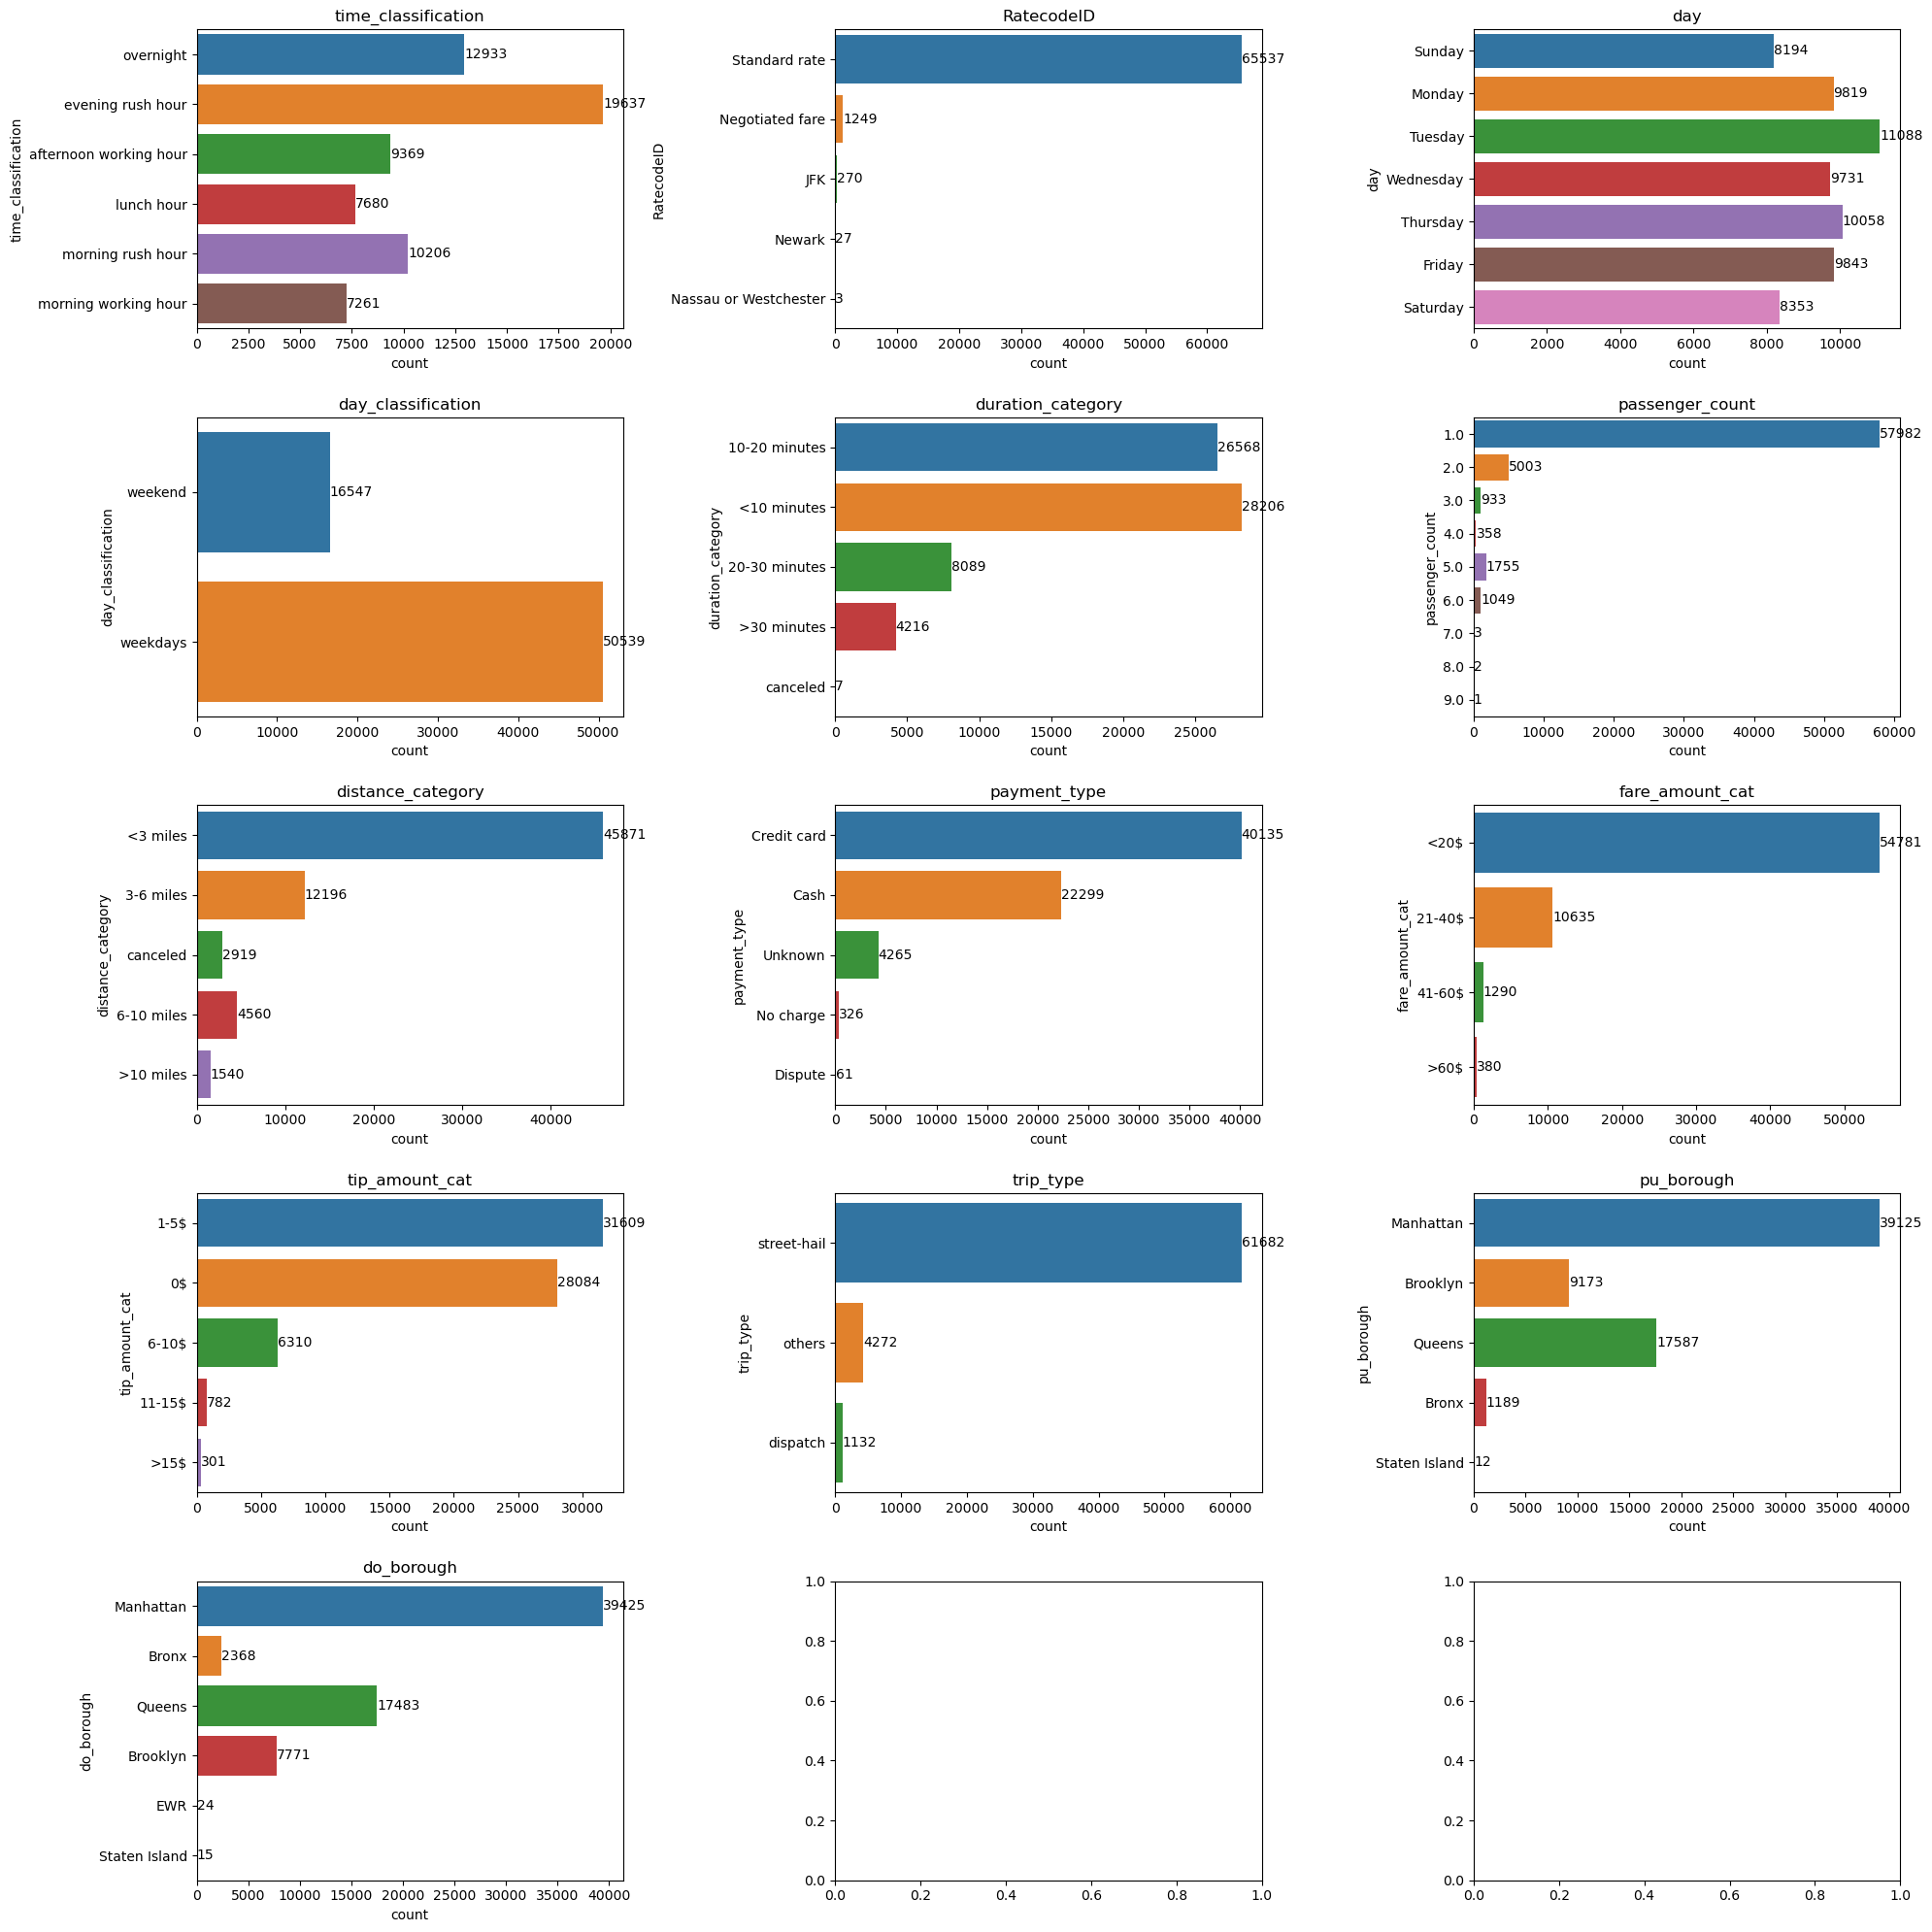

In [7]:
cols = ['time_classification', 'RatecodeID' , 'day', 'day_classification', 'duration_category', 
        'passenger_count', 'distance_category', 'payment_type', 'fare_amount_cat', 
        'tip_amount_cat', 'trip_type', 'pu_borough', 'do_borough']

fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 20))
axs = axs.flatten()

for i, col in enumerate(cols):
    # Create a horizontal bar plot
    bars = sns.countplot(data=df, y=col, ax=axs[i])
    axs[i].set_title(col)

    # Positioning labels for horizontal bars
    for idx, bar in enumerate(bars.patches):
        x_value = bar.get_width()  # Width of the bar (count)
        y_value = bar.get_y() + bar.get_height() / 2  # Middle of the bar
        label = "{:.0f}".format(bar.get_width())  # Count as label
        axs[i].text(x_value, y_value, label, ha='left', va='center') 

plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()


`Highlights` <br>
Based on the table above, there are several conclusions that can be highlighted:

1. Taxi pickups in NYC are dominated by the borough **Manhattan** and drop-offs in the borough **Manhattan**.
2. Passengers order taxis via **street-hail**.
3. The peak of taxi travel is during the **evening rush hour** on **Tuesday**.
4. The journeys are dominated by short trips, namely distances **less than 3 miles**, and travel times of **0 - 20 minutes**.

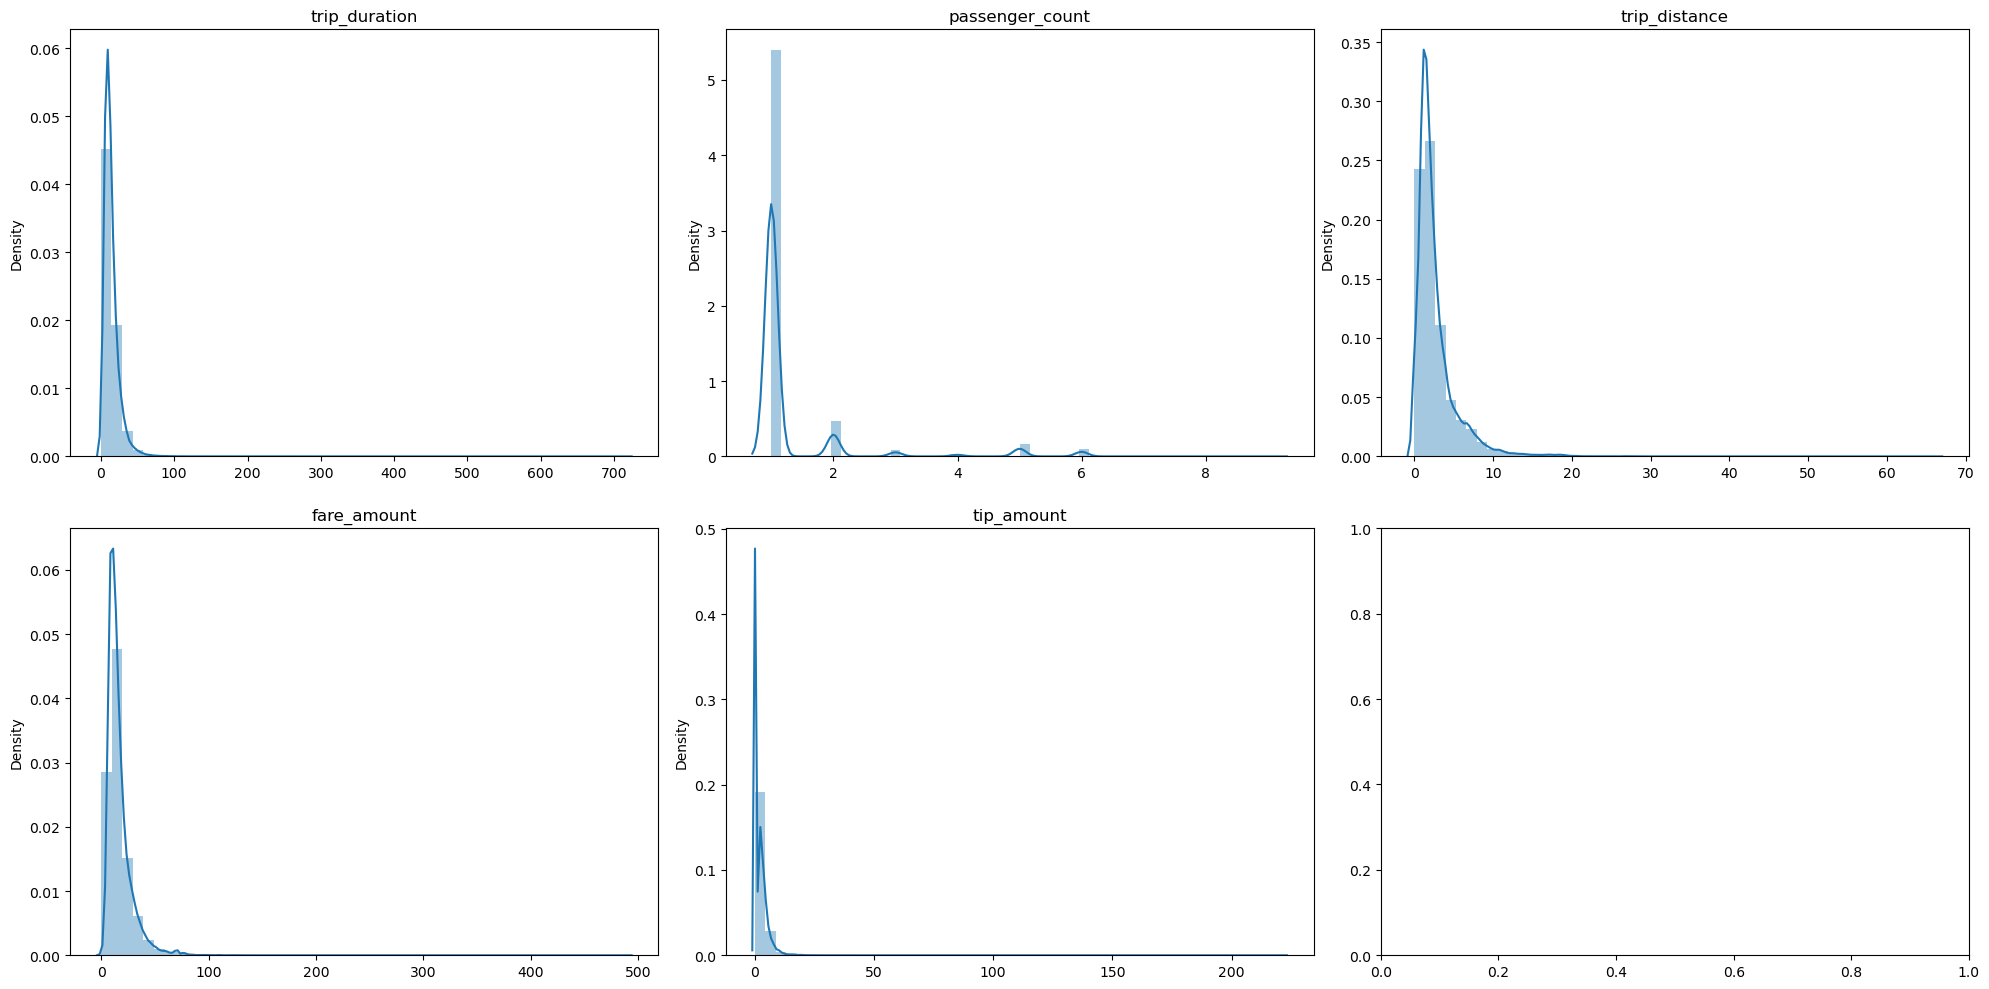

In [8]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k, v in df.select_dtypes(include=[np.number]).items():
    axs[index].set_title(k)
    sns.distplot(x=df[k], ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

`Highlights` <br>
Based on the table above, there is one conclusion that can be highlighted:
1. Each column in the table has a non-normal data distribution.

# Data Analysis

## Introduction : RateCode Trend Analysis
To start the data analysis, we start from the Rate Code Trend Analysis and the number of passengers per trip first to find out the distribution of the values ​​of these variables during the month of January 2023

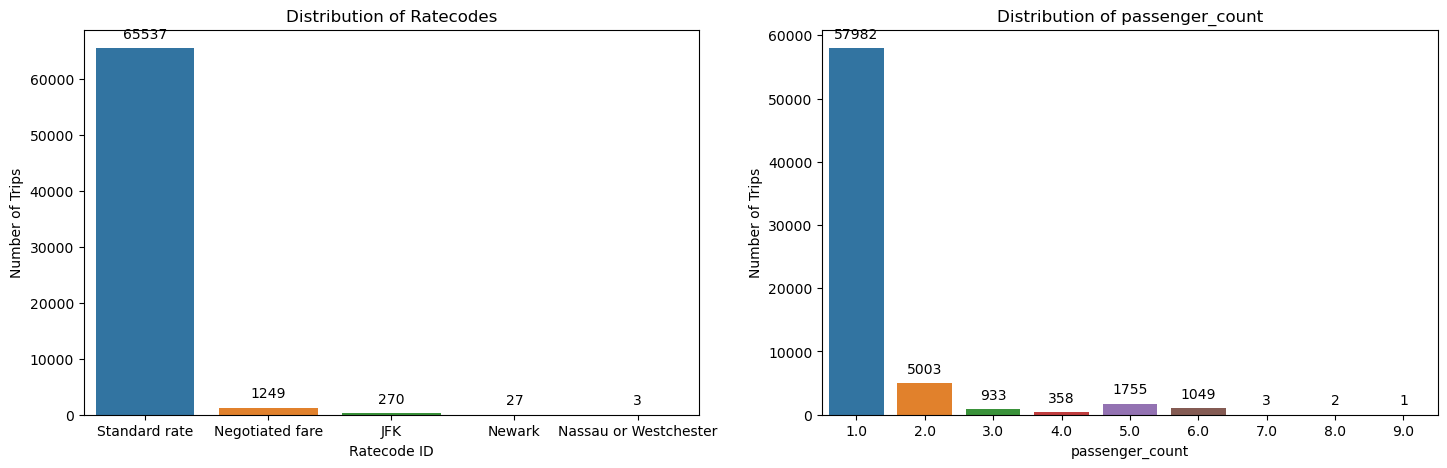

In [9]:
plt.figure(figsize=(27,5))

plt.subplot(1,3,1)

# Ratecode distribution 
ratecode_distribution = df['RatecodeID'].value_counts()

# Creating ratecode distribution
barplot = sns.barplot(x=ratecode_distribution.index, y=ratecode_distribution.values)
plt.title('Distribution of Ratecodes')
plt.xlabel('Ratecode ID')
plt.ylabel('Number of Trips')
# Adding labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.subplot(1,3,2)
# passenger count distribution
ratecode_distribution = df['passenger_count'].value_counts()

# Creating a bar plot
barplot = sns.barplot(x=ratecode_distribution.index, y=ratecode_distribution.values)
plt.title('Distribution of passenger_count')
plt.xlabel('passenger_count')
plt.ylabel('Number of Trips')
# Adding labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
plt.show()

`Highlights` <br>
Based on the table above, there is one conclusion that can be highlighted:<br>
1. Ratecode distribution is dominated by Standard Rate
2. The distribution of passengers per trip is dominated by 1 passenger

## Time Based Data Analysis
The Time Based Data Analysis approach is applied to determine the distribution of over time data .<br>
This Time Based approach begins by creating a new table with columns pickup_datetime, trip_bydate, day_of_week, trip_byday, day_count, avg_trip, day_cat, count_trip_bycat

In [10]:
# categorize date on date (ex: 1 jan, 2 jan, ...)
january_trip = df.groupby(df['pickup_datetime'].dt.date).agg(trip_bydate=('pickup_datetime', 'count')).reset_index()
january_trip['pickup_datetime'] = pd.to_datetime(january_trip['pickup_datetime'])
january_trip['day_of_week'] = january_trip['pickup_datetime'].dt.day_name()

# categorize day on day (ex: mon, tue, ...)
trip_byday = january_trip.groupby('day_of_week').agg(trip_byday=('trip_bydate', 'sum'), day_count=('day_of_week', 'count'), avg_trip=('trip_bydate', 'mean')).reset_index()
trip_byday['day_cat']= trip_byday['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')      # add day category

# categorize by day category (ex: weekend, weekday)
trip_byday_cat = trip_byday.groupby('day_cat').agg(count_trip_bycat=('trip_byday', 'sum')).reset_index()

trip_merge = pd.merge(january_trip, trip_byday, on='day_of_week', how='left')   # merge trip monthly and trip trip daily
trip_merge = pd.merge(trip_merge, trip_byday_cat, on='day_cat', how='left')     # merge syntax above and trip_daily_cat
display (january_trip.head(),trip_byday, trip_byday_cat, trip_merge)

,pickup_datetime,trip_bydate,day_of_week
0,2023-01-01,1430,Sunday
1,2023-01-02,1533,Monday
2,2023-01-03,2086,Tuesday
3,2023-01-04,2335,Wednesday
4,2023-01-05,2370,Thursday


,day_of_week,trip_byday,day_count,avg_trip,day_cat
0,Friday,9843,4,2460.75,Weekdays
1,Monday,9819,5,1963.80,Weekdays
2,Saturday,8353,4,2088.25,Weekend
3,Sunday,8194,5,1638.80,Weekend
4,Thursday,10058,4,2514.50,Weekdays
5,Tuesday,11088,5,2217.60,Weekdays
6,Wednesday,9731,4,2432.75,Weekdays


,day_cat,count_trip_bycat
0,Weekdays,50539
1,Weekend,16547


,pickup_datetime,trip_bydate,day_of_week,trip_byday,day_count,avg_trip,day_cat,count_trip_bycat
0,2023-01-01,1430,Sunday,8194,5,1638.80,Weekend,16547
1,2023-01-02,1533,Monday,9819,5,1963.80,Weekdays,50539
2,2023-01-03,2086,Tuesday,11088,5,2217.60,Weekdays,50539
3,2023-01-04,2335,Wednesday,9731,4,2432.75,Weekdays,50539
4,2023-01-05,2370,Thursday,10058,4,2514.50,Weekdays,50539
5,2023-01-06,2506,Friday,9843,4,2460.75,Weekdays,50539
6,2023-01-07,2110,Saturday,8353,4,2088.25,Weekend,16547
7,2023-01-08,1629,Sunday,8194,5,1638.80,Weekend,16547
8,2023-01-09,2173,Monday,9819,5,1963.80,Weekdays,50539
9,2023-01-10,2136,Tuesday,11088,5,2217.60,Weekdays,50539


### Day Analysis

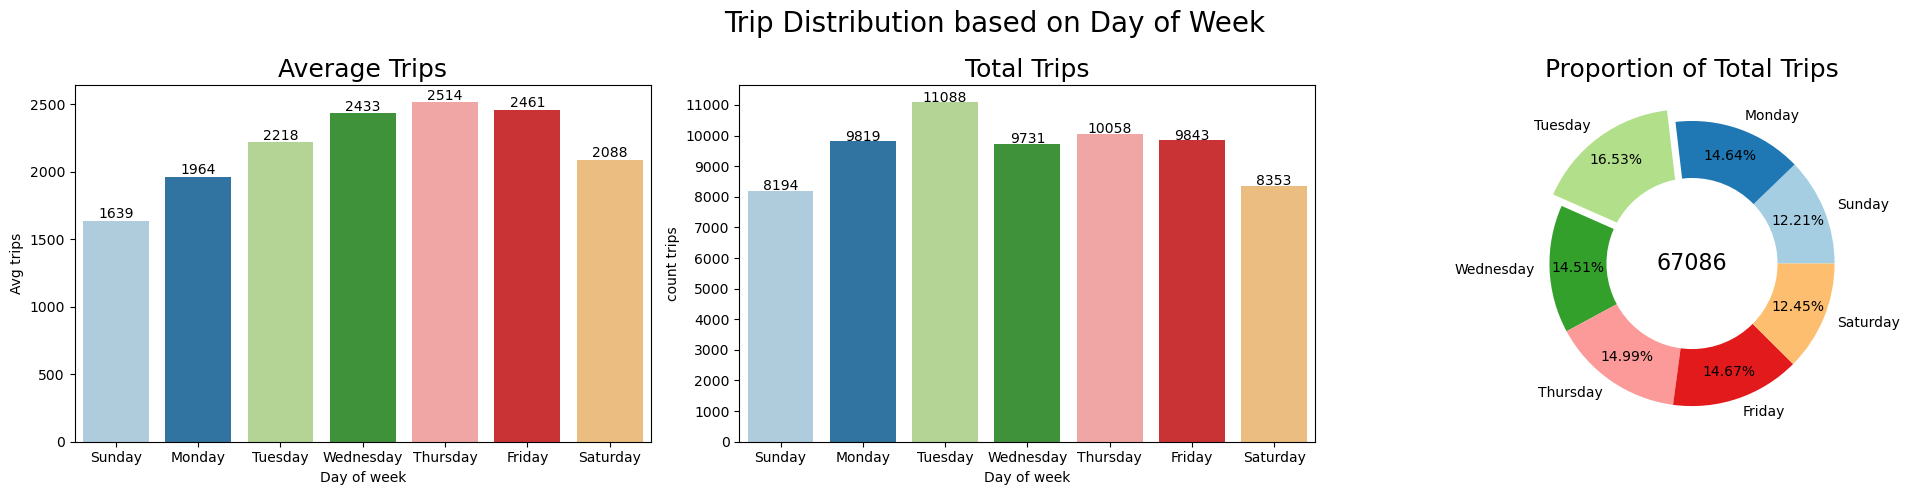

In [11]:
plt.figure(figsize=(20,5))

plt.suptitle('Trip Distribution based on Day of Week', fontsize=20)


plt.subplot(1,3,1)
bars = sns.barplot(x=trip_merge['day_of_week'].unique().tolist(), 
                   y=trip_merge['avg_trip'].unique().tolist(), 
                   palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 20
    label = "{:.0f}".format(trip_merge['avg_trip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')


plt.title('Average Trips', fontsize=18)
plt.xlabel('Day of week')
plt.ylabel('Avg trips')
plt.yticks(np.arange(0, 2501, 500))
plt.subplot(1,3,2)
bars = sns.barplot(x=trip_merge['day_of_week'].unique().tolist(), 
                   y=trip_merge['trip_byday'].unique().tolist(), 
                   palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 20
    label = "{:.0f}".format(trip_merge['trip_byday'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Total Trips', fontsize=18)
plt.xlabel('Day of week')
plt.ylabel('count trips')
plt.yticks(np.arange(0, 12000, 1000))


plt.subplot(1,3,3)
plt.pie(x=trip_merge['trip_byday'].unique().tolist(), 
        labels=trip_merge['day_of_week'].unique().tolist(), 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0,0,0.1,0,0,0,0), 
        colors=color)
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0, 0, trip_merge['trip_byday'].unique().sum(), ha='center', va='center', fontsize=16)
plt.title('Proportion of Total Trips', fontsize=18)

plt.tight_layout()
plt.show()

`Insights`
- The average taxi usage is highest on Wednesday, Thursday and Friday.
- The average taxi usage is lowest on Sundays.
- Even though in the left barchart the highest average taxi demand was on Wednesday, Thursday and Friday; In total, the highest number of taxi requests is on Tuesday. This is natural because there is a fifth week in the month, this include Sunday, Monday and Tuesday.

### Day, Time Analysis

#### Time Category Classification

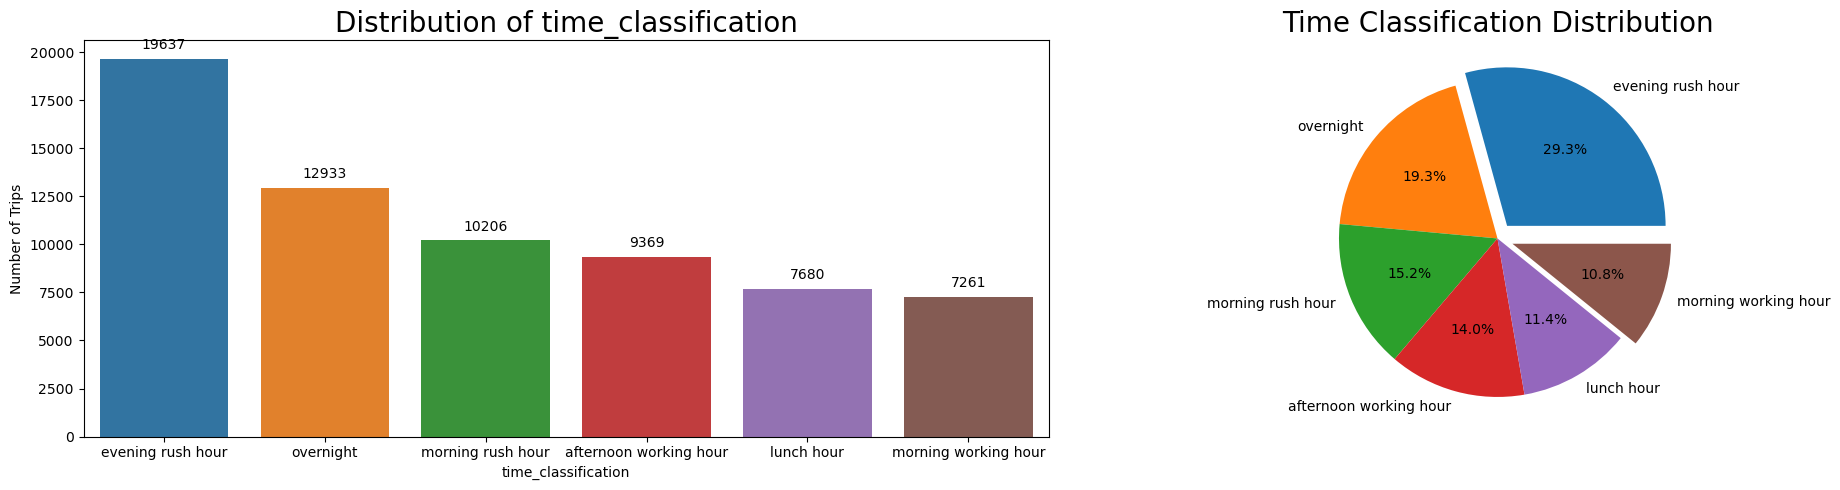

In [12]:
time_classification1 = df["time_classification"].value_counts()
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
barplot = sns.barplot(x=time_classification1.index, y=time_classification1.values)
plt.title('Distribution of time_classification', fontsize=20)
plt.xlabel('time_classification')
plt.ylabel('Number of Trips')

# Adding labels to each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

# Second subplot for the pie chart
plt.subplot(1, 2, 2)

plt.pie(time_classification1.values, labels=time_classification1.index, autopct='%1.1f%%', explode = (0.1, 0, 0, 0, 0, 0.1))
plt.title('Time Classification Distribution', fontsize=20)


plt.tight_layout()
plt.show()    

`Insights`<br>
- Based on the table above, the most taxi requests are in the evening rush hour at 29.3% and the least at the morning working hour at 10.8%

#### Hour Classification

In [13]:
## average Trip Count (1)


# Define the order of days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create the crosstab with the average fare amount
cross1 = pd.crosstab(index=df['pickup_datetime'].dt.day_name(), 
                    columns=df['pickup_datetime'].dt.hour, 
                    values=df['fare_amount'], 
                    aggfunc='count').reindex(day_order)

# Removing column name and setting index name
cross1.columns.name = None
cross1.index.name = 'Day of Week'

# Resetting the index to make 'Day of Week' a column
cross_reset1 = cross1.reset_index()

# Melting the dataframe to convert it from wide to long format for line plot
melted_cross1 = cross_reset1.melt(id_vars='Day of Week', var_name='Hour of Day', value_name='trip count')
cross1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Sunday,309,300,249,220,161,84,69,111,138,245,348,451,517,529,554,600,598,551,547,481,417,319,216,180
Monday,125,79,58,76,62,62,142,404,469,545,543,562,585,635,642,770,769,766,770,603,406,338,247,161
Tuesday,92,55,46,44,23,65,204,578,721,708,632,605,636,618,722,795,862,850,860,681,506,347,265,173
Wednesday,94,69,33,29,20,49,181,447,564,576,571,524,499,542,592,731,777,814,794,662,457,306,236,164
Thursday,102,69,54,35,37,56,175,466,566,597,567,558,530,549,649,720,757,838,853,603,487,341,259,190
Friday,148,88,46,41,31,51,150,468,500,517,519,505,472,507,672,768,754,776,775,630,458,365,324,278
Saturday,234,199,143,122,100,53,53,127,208,277,398,478,501,560,509,645,621,553,575,517,463,356,333,328


In [14]:
## average fare amount (2)

# Define the order of days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create the crosstab with the average fare amount
cross2 = pd.crosstab(index=df['pickup_datetime'].dt.day_name(), 
                    columns=df['pickup_datetime'].dt.hour, 
                    values=df['fare_amount'], 
                    aggfunc='mean').reindex(day_order)

# Removing column name and setting index name
cross2.columns.name = None
cross2.index.name = 'Day of Week'

# Resetting the index to make 'Day of Week' a column
cross_reset2 = cross2.reset_index()

# Melting the dataframe to convert it from wide to long format for line plot
melted_cross2 = cross_reset2.melt(id_vars='Day of Week', var_name='Hour of Day', value_name='Average Fare')
cross2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Sunday,18.079191,19.741100,20.658514,21.604455,20.405155,22.561310,19.945362,17.043063,17.520725,15.690367,15.430460,15.921020,15.632824,17.148015,17.027563,16.190367,15.740669,15.840490,15.256527,14.620873,17.138106,15.628809,14.692222,15.339611
Monday,16.263360,16.541392,20.380690,16.055658,24.880484,23.949839,17.232746,15.886262,17.076034,16.447651,16.856446,16.590623,16.624786,16.164583,17.279019,16.601870,15.917776,15.375431,15.432844,14.741841,15.598867,15.715592,18.643482,15.620621
Tuesday,15.533043,13.099273,19.651522,22.124091,25.531304,22.891538,15.305784,16.316194,17.325340,17.386582,16.971361,17.358479,16.931808,17.980906,17.849820,17.800868,15.578376,15.773965,15.027733,13.626887,14.298933,14.000375,14.585434,15.297688
Wednesday,15.230319,17.361449,19.417576,22.241379,21.611500,23.414286,18.310331,14.982752,16.646791,16.514323,16.579580,16.870878,17.286894,16.980092,16.491875,16.456908,16.458533,16.901192,14.655919,14.147221,14.697527,13.954641,14.328136,16.548720
Thursday,15.195882,14.139420,17.813519,16.896286,18.710811,22.884107,18.150400,16.343133,16.719152,16.522362,17.380511,18.081111,17.696358,18.252714,18.405532,16.881042,16.796711,15.798687,15.284889,13.873698,14.813799,17.044721,15.281236,15.136789
Friday,15.714932,16.080568,17.519130,22.979756,22.820645,25.093333,17.433600,16.013953,16.348580,16.818124,17.042832,16.899426,16.251970,16.283590,17.557634,16.815898,15.826936,16.362964,15.581303,15.265206,15.251135,15.560493,16.392901,15.612554
Saturday,15.902564,17.086482,18.752657,22.088607,20.814900,23.088491,21.544717,17.947402,18.506731,17.132816,16.529523,15.655607,16.760739,16.571000,16.594853,16.443256,16.405105,16.953291,16.363670,16.934971,15.794536,15.870758,16.902162,16.875640


In [15]:
## avg trip distance (3)
# Define the order of days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create the crosstab with the average fare amount
cross3 = pd.crosstab(index=df['pickup_datetime'].dt.day_name(), 
                    columns=df['pickup_datetime'].dt.hour, 
                    values=df['trip_distance'], 
                    aggfunc='mean').reindex(day_order)

# Removing column name and setting index name
cross3.columns.name = None
cross3.index.name = 'Day of Week'

# Resetting the index to make 'Day of Week' a column
cross_reset3 = cross3.reset_index()

# Melting the dataframe to convert it from wide to long format for line plot
melted_cross3 = cross_reset3.melt(id_vars='Day of Week', var_name='Hour of Day', value_name='distance mean')
cross3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Sunday,3.212492,3.407233,3.639317,3.246273,3.297702,4.015595,3.839565,3.156036,3.317971,2.615796,2.686810,2.911752,2.630251,2.808941,2.866245,2.763733,2.639264,2.529147,2.498665,2.362287,2.863285,2.467712,2.558194,2.756556
Monday,2.769440,3.169114,3.360000,2.682895,4.850968,4.190968,3.129789,2.676807,2.663518,2.617284,2.680866,2.778167,2.710906,2.687638,2.711900,2.465948,2.483940,2.377428,2.561727,2.487778,2.499532,2.587485,2.937692,2.844099
Tuesday,2.948587,2.269818,3.911087,3.468636,4.999565,3.552923,2.467990,2.527561,2.632718,2.770014,2.689984,2.550215,2.569214,2.822282,2.709598,2.600478,2.300220,2.404129,2.452279,2.268282,2.475158,2.457262,2.585283,2.774624
Wednesday,2.408936,2.918261,3.408788,4.243793,3.609000,3.914490,2.943646,2.284407,2.598227,2.665434,2.604326,2.624008,2.708096,2.672177,2.498497,2.430930,2.428288,2.544877,2.320327,2.316616,2.350766,2.344771,2.392246,2.972744
Thursday,2.455490,2.535652,3.204074,2.992857,2.955676,4.367679,3.159143,2.500923,2.385919,2.727471,2.740776,2.851703,2.712491,2.977614,2.970786,2.556958,2.595337,2.359558,2.437093,2.200779,2.596324,2.799971,2.578069,2.606158
Friday,2.874459,2.697159,2.698696,4.273902,4.230000,4.097255,3.082400,2.545427,2.635700,2.781625,2.828266,2.710733,2.376970,2.517022,2.678274,2.562891,2.411552,2.502822,2.429987,2.455810,2.528886,2.729397,2.989383,2.862266
Saturday,2.846795,3.157236,3.211329,3.363197,3.134600,4.614906,4.211887,3.154016,3.528750,3.131588,2.805402,2.672469,2.939920,2.835339,2.621552,2.510992,2.617568,2.759584,2.586696,2.506983,2.469136,2.646657,3.043754,2.955884


In [16]:
## average trip duration (4)
# Define the order of days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create the crosstab with the average fare amount
cross4 = pd.crosstab(index=df['pickup_datetime'].dt.day_name(), 
                    columns=df['pickup_datetime'].dt.hour, 
                    values=df['trip_duration'], 
                    aggfunc='mean').reindex(day_order)

# Removing column name and setting index name
cross4.columns.name = None
cross4.index.name = 'Day of Week'

# Resetting the index to make 'Day of Week' a column
cross_reset4 = cross4.reset_index()

# Melting the dataframe to convert it from wide to long format for line plot
melted_cross4 = cross_reset4.melt(id_vars='Day of Week', var_name='Hour of Day', value_name='trip duration')
cross4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Sunday,14.040507,13.464000,14.133668,13.247197,13.915631,14.805159,13.947343,10.473724,10.748430,11.583537,11.600862,11.844863,12.335622,17.736452,13.584116,14.177778,14.453846,15.241470,13.193266,12.315696,13.256395,10.989864,11.072840,11.177963
Monday,12.061467,12.445359,12.940805,12.624781,17.020430,15.618011,12.589789,13.153795,15.152701,13.885382,14.068662,13.575593,13.756154,14.689055,16.183074,15.763918,14.654140,13.821845,13.204524,11.987092,11.665764,11.436243,11.439474,10.991615
Tuesday,16.923370,9.138788,14.553986,13.725000,17.014493,15.469744,11.667892,14.432930,15.660610,15.290348,14.827373,14.933361,15.590278,16.412028,16.899007,17.565346,14.431303,15.165333,13.277422,11.334141,10.656522,10.928963,10.343459,11.503276
Wednesday,10.363121,12.782850,15.832828,16.040805,10.619167,16.458163,14.270534,12.759023,14.737234,14.491059,14.274548,14.201877,16.436740,14.625584,15.835163,15.320383,14.562591,14.800860,13.313014,11.609819,11.195915,10.749346,10.454379,12.572967
Thursday,12.674346,10.754348,12.151852,13.419048,11.434234,15.828869,13.803048,14.472997,15.736249,15.299274,15.300735,15.884528,18.070000,15.444384,16.791628,17.457037,16.397204,14.646460,14.442224,12.547540,12.698426,12.729863,11.678121,11.149123
Friday,11.649437,10.747348,13.302899,16.046341,15.646774,15.593137,13.194222,13.787927,14.196300,14.112669,14.339660,14.513630,13.685028,14.322978,16.222148,16.355469,15.038793,15.494888,13.640817,12.650741,12.968450,12.438402,12.492387,12.389448
Saturday,11.943162,11.973618,13.498485,13.500000,12.629333,13.750314,12.579874,12.588845,12.080369,12.326474,12.165327,12.261750,13.279108,14.939048,14.762344,14.789871,14.124557,16.228511,14.413826,14.192650,13.663535,12.727669,13.232933,13.237703


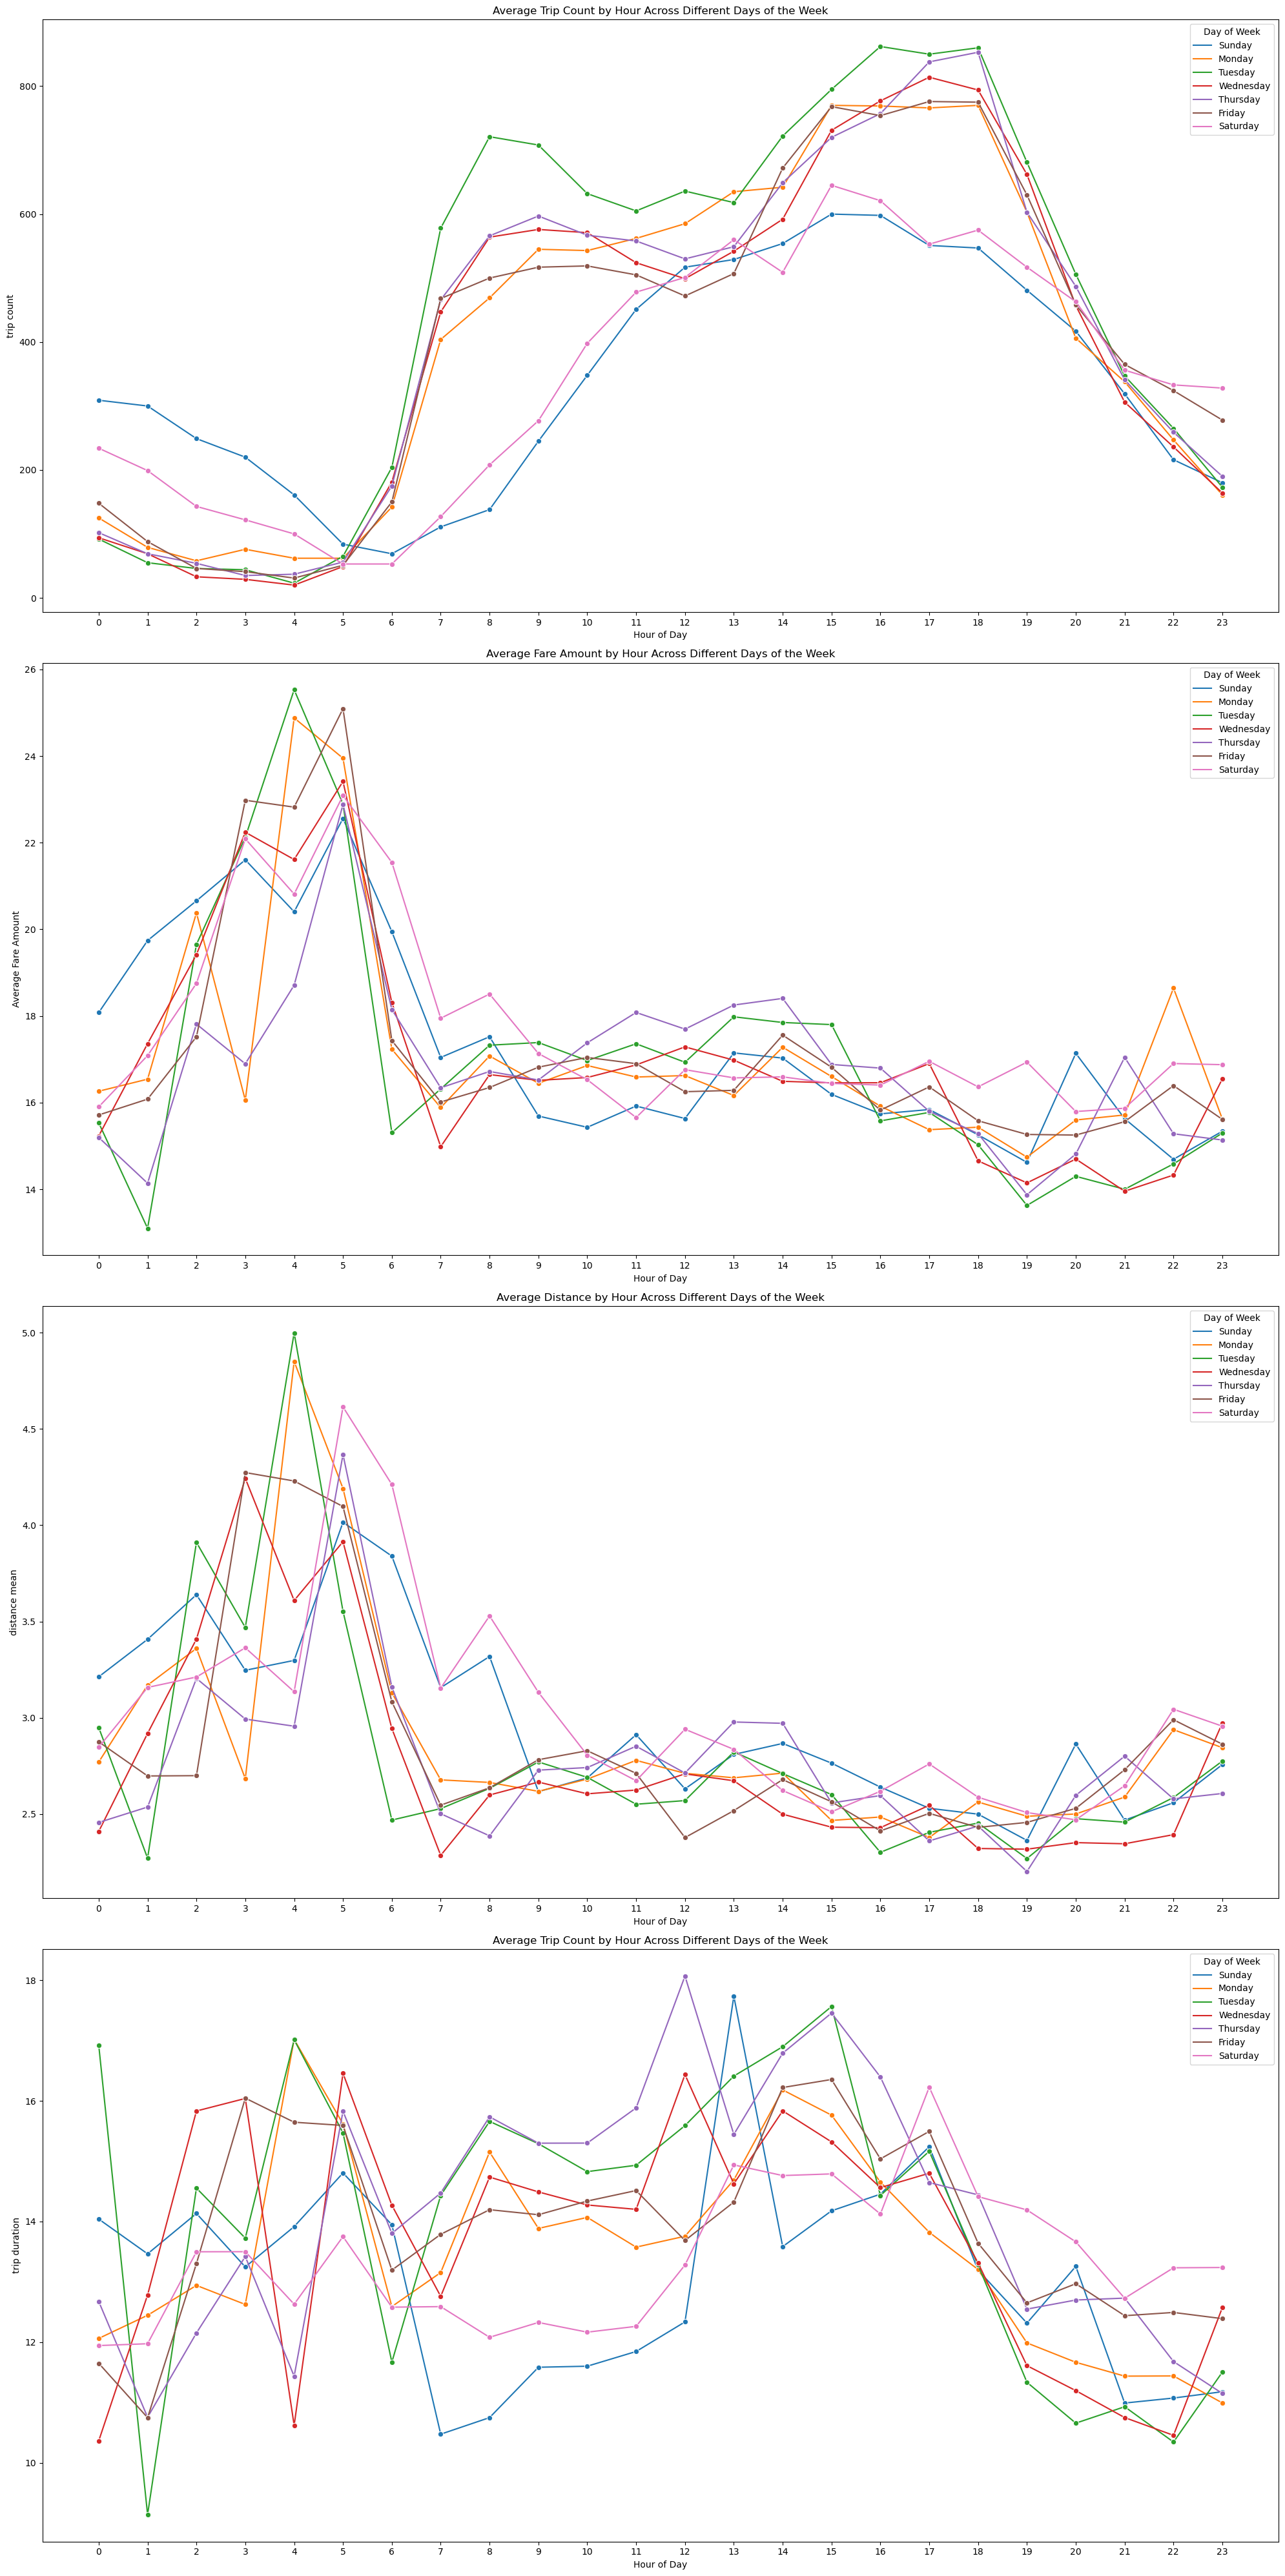

In [17]:
plt.figure(figsize=(20, 40
))

plt.subplot(4, 1, 1)
sns.lineplot(data=melted_cross1, x='Hour of Day', y='trip count', hue='Day of Week', marker='o')
plt.title('Average Trip Count by Hour Across Different Days of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('trip count')
plt.xticks(range(0, 24))  # Setting x-ticks for every hour

# Line chart in the upper subplot
plt.subplot(4, 1, 2)
sns.lineplot(data=melted_cross2, x='Hour of Day', y='Average Fare', hue='Day of Week', marker='o')
plt.title('Average Fare Amount by Hour Across Different Days of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare Amount')
plt.xticks(range(0, 24))  # Setting x-ticks for every hour

# Line chart in the upper subplot
plt.subplot(4, 1, 3)
sns.lineplot(data=melted_cross3, x='Hour of Day', y='distance mean', hue='Day of Week', marker='o')
plt.title('Average Distance by Hour Across Different Days of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('distance mean')
plt.xticks(range(0, 24))  # Setting x-ticks for every hour

# Line chart in the upper subplot
plt.subplot(4, 1, 4)
sns.lineplot(data=melted_cross4, x='Hour of Day', y='trip duration', hue='Day of Week', marker='o')
plt.title('Average Trip Count by Hour Across Different Days of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('trip duration')
plt.xticks(range(0, 24))  # Setting x-ticks for every hour

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plots
plt.show()

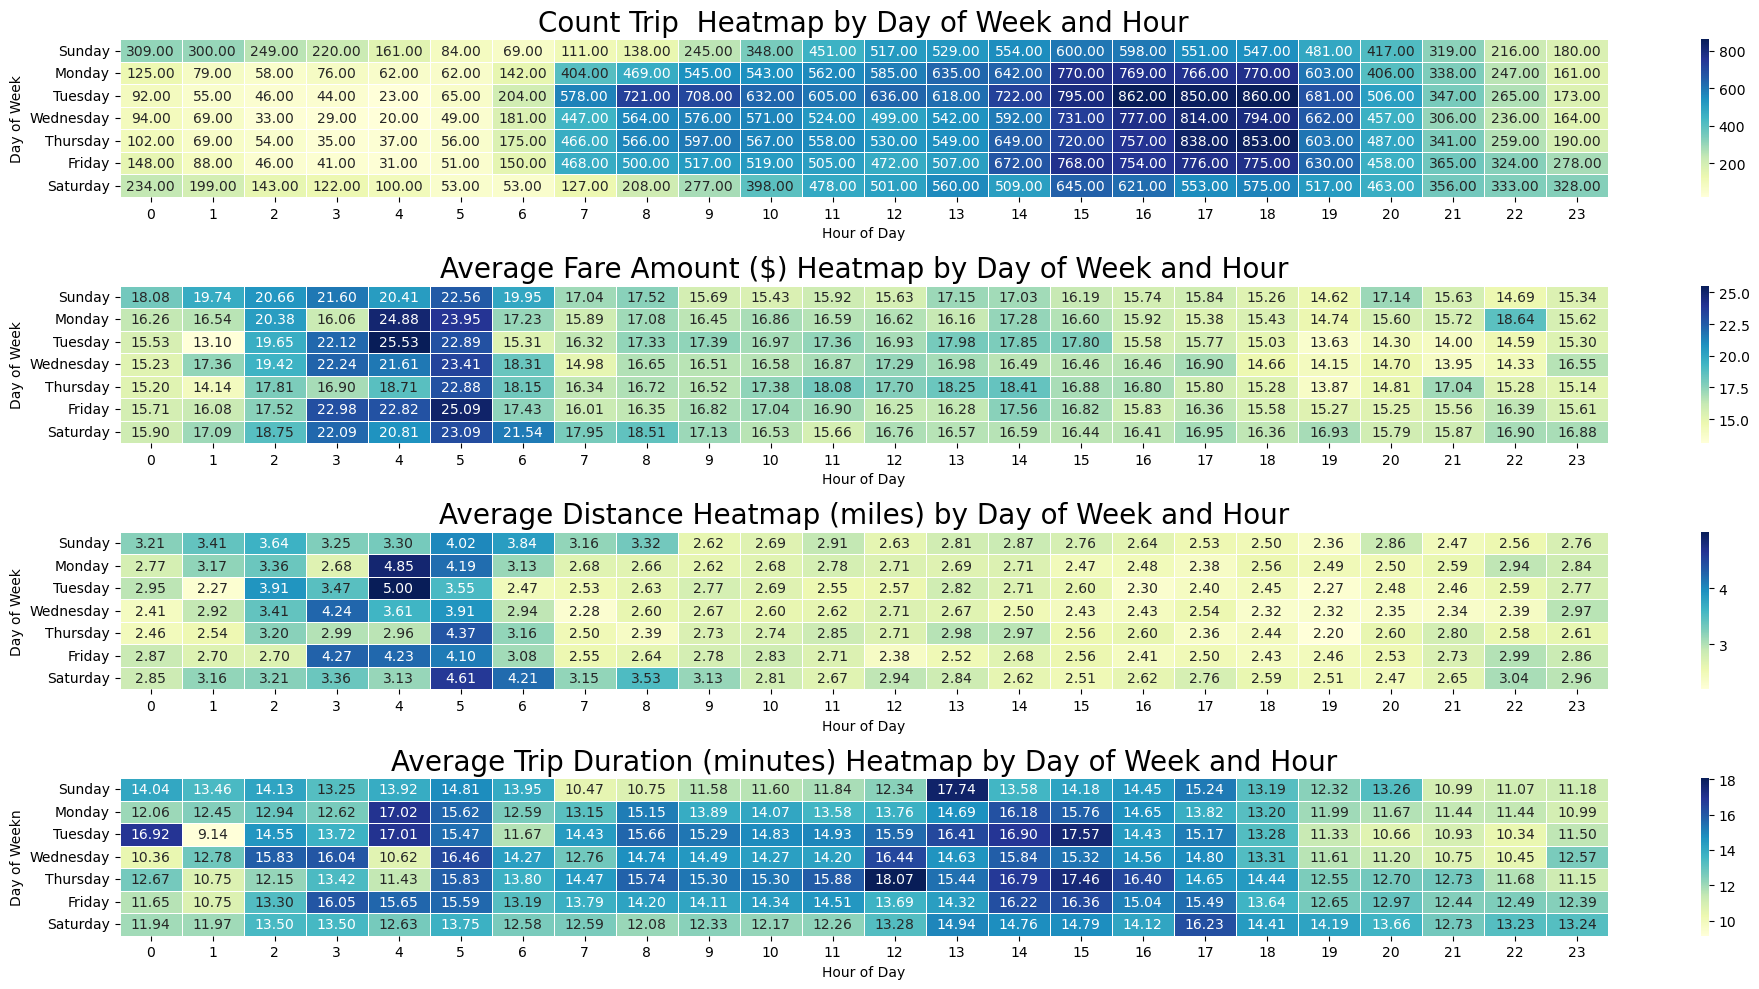

In [18]:
plt.figure(figsize=(20, 10))
# Heatmap in the lower subplot
plt.subplot(4, 1, 1)
sns.heatmap(cross1, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Count Trip  Heatmap by Day of Week and Hour', fontsize=20)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Heatmap in the lower subplot
plt.subplot(4, 1, 2)
sns.heatmap(cross2, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Fare Amount ($) Heatmap by Day of Week and Hour', fontsize=20)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Heatmap in the lower subplot
plt.subplot(4, 1, 3)
sns.heatmap(cross3, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Distance Heatmap (miles) by Day of Week and Hour', fontsize=20)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Heatmap in the lower subplot
plt.subplot(4, 1, 4)
sns.heatmap(cross4, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Trip Duration (minutes) Heatmap by Day of Week and Hour', fontsize=20)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Weekn')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plots
plt.show()

`Insights`
- Based on the TripCount heatmap we can see that the demand for taxis in New York City starts to increase at 7 am and peaks at 15-19
- Based on the Average FareAmount heatmap, we can see that travel in the early morning hours 2 - 5 am, is relatively more expensive compared to other times
- Based on the Average Distance heatmap, we can see that the average travel distance in New York City is relatively small, around 5 km.
- Based on the Average Distance heatmap, we can see that the average travel time in New York City is not too big, around 17 minutes.

## Location Analysis
For location analysis, firstly, we do grouping origin and destination routes based on boroughs and zones


### borough and zone Analysis

In [19]:
pu_agg_borough = df.groupby('pu_borough').agg(count=('pu_borough', 'count')).sort_values(by='count', ascending=False).reset_index()
pu_agg_zone = df.groupby('pu_zone').agg(count=('pu_zone', 'count')).sort_values(by='count', ascending=False).reset_index()

do_agg_borough = df.groupby('do_borough').agg(count=('do_borough', 'count')).sort_values(by='count', ascending=False).reset_index()
do_agg_zone = df.groupby('do_zone').agg(count=('do_zone', 'count')).sort_values(by='count', ascending=False).reset_index()

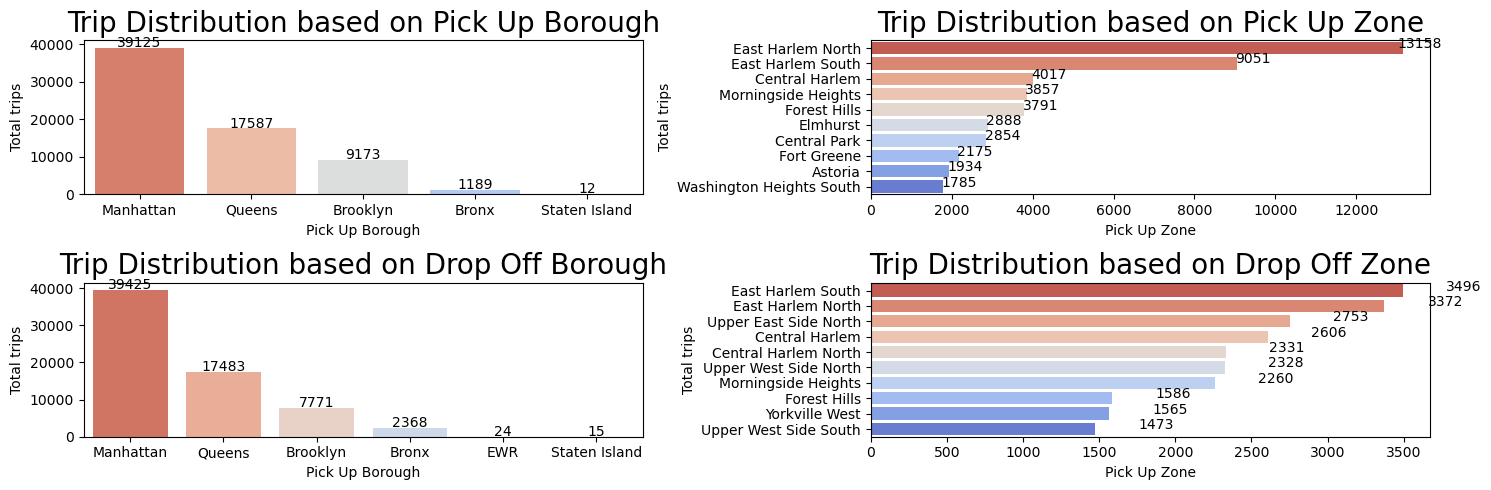

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
bars = sns.barplot(x=pu_agg_borough['pu_borough'], 
                   y=pu_agg_borough['count'], 
                   palette=scale)
for idx, bar in enumerate(bars.patches):
    # Get X and Y placement of label from bar
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(pu_agg_borough['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trip Distribution based on Pick Up Borough', fontsize=20)
plt.xlabel('Pick Up Borough')
plt.ylabel('Total trips')

plt.subplot(2,2,2)
bars = sns.barplot(data=pu_agg_zone.head(10),
                   y='pu_zone', 
                   x='count', 
                   palette=scale)
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(pu_agg_zone['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trip Distribution based on Pick Up Zone', fontsize=20)
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')

plt.subplot(2,2,3)
bars = sns.barplot(x=do_agg_borough['do_borough'], 
                   y=do_agg_borough['count'], 
                   palette=scale)
for idx, bar in enumerate(bars.patches):
    # Get X and Y placement of label from bar
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(do_agg_borough['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trip Distribution based on Drop Off Borough', fontsize=20)
plt.xlabel('Pick Up Borough')
plt.ylabel('Total trips')

plt.subplot(2,2,4)
bars = sns.barplot(data=do_agg_zone.head(10),
                   y='do_zone', 
                   x='count', 
                   palette=scale)
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(do_agg_zone['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trip Distribution based on Drop Off Zone', fontsize=20)
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')



plt.tight_layout()
plt.show()

`Insights`
- Based on the table above, we can see that the pick up and drop off locations are dominated by the borough of Manhattan, and the least is Staten Island
- For pick up zones, East Harlem North is the busiest zone, as well as for drop off
- For next Analysis, Harlem north to East Harlem South will be point as a sample

### Route Analysis
disini kita coba mengelompokkan rute asal dan tujuan, trip_count, avg_duration, avg_distance, total_fare, avg_fare, total_tip, avg_tip

In [21]:
trip_amount_dist = df.groupby(['pu_zone','pu_borough', 'do_zone','do_borough']).agg(trip_count=('pu_zone', 'count'),
                                                        avg_duration =('trip_duration', 'mean'),
                                                        avg_distance = ('trip_distance', 'mean'),
                                                        total_fare=('fare_amount', 'sum'), 
                                                        avg_fare=('fare_amount', 'mean'),
                                                        total_tip=('tip_amount', 'sum'),
                                                        avg_tip=('tip_amount', 'mean')).reset_index().sort_values(by=['trip_count'], ascending=False).head(10).round(2)
route1 = trip_amount_dist['pu_zone'] + " - " + trip_amount_dist['do_zone']
route2 = trip_amount_dist['pu_borough'] + " - " + trip_amount_dist['do_borough']
trip_amount_dist.insert(0, 'Route', route1)
trip_amount_dist.insert(1, 'Route1', route2)
trip_amount_dist.drop(columns=['pu_zone', 'do_zone', 'do_borough', 'pu_borough'], inplace=True)

In [22]:
trip_amount_dist

,Route,Route1,trip_count,avg_duration,avg_distance,total_fare,avg_fare,total_tip,avg_tip
1862,East Harlem North - East Harlem South,Manhattan - Manhattan,1993,8.74,1.34,19666.63,9.87,3075.36,1.54
2009,East Harlem South - East Harlem North,Manhattan - Manhattan,1452,6.38,1.28,12556.17,8.65,1837.65,1.27
2649,Forest Hills - Forest Hills,Queens - Queens,1191,7.95,1.03,11122.91,9.34,1346.46,1.13
1951,East Harlem North - Upper East Side North,Manhattan - Manhattan,1186,12.37,1.99,15357.53,12.95,3144.78,2.65
1844,East Harlem North - Central Harlem,Manhattan - Manhattan,966,7.01,1.04,8215.94,8.51,1148.03,1.19
1914,East Harlem North - Morningside Heights,Manhattan - Manhattan,933,11.55,1.72,11388.75,12.21,1864.95,2.00
1861,East Harlem North - East Harlem North,Manhattan - Manhattan,806,5.64,0.81,6798.47,8.43,612.98,0.76
1845,East Harlem North - Central Harlem North,Manhattan - Manhattan,737,8.40,1.35,7385.57,10.02,684.38,0.93
2010,East Harlem South - East Harlem South,Manhattan - Manhattan,735,5.53,0.76,5686.15,7.74,632.25,0.86
1953,East Harlem North - Upper West Side North,Manhattan - Manhattan,696,14.96,2.67,11231.33,16.14,2149.02,3.09


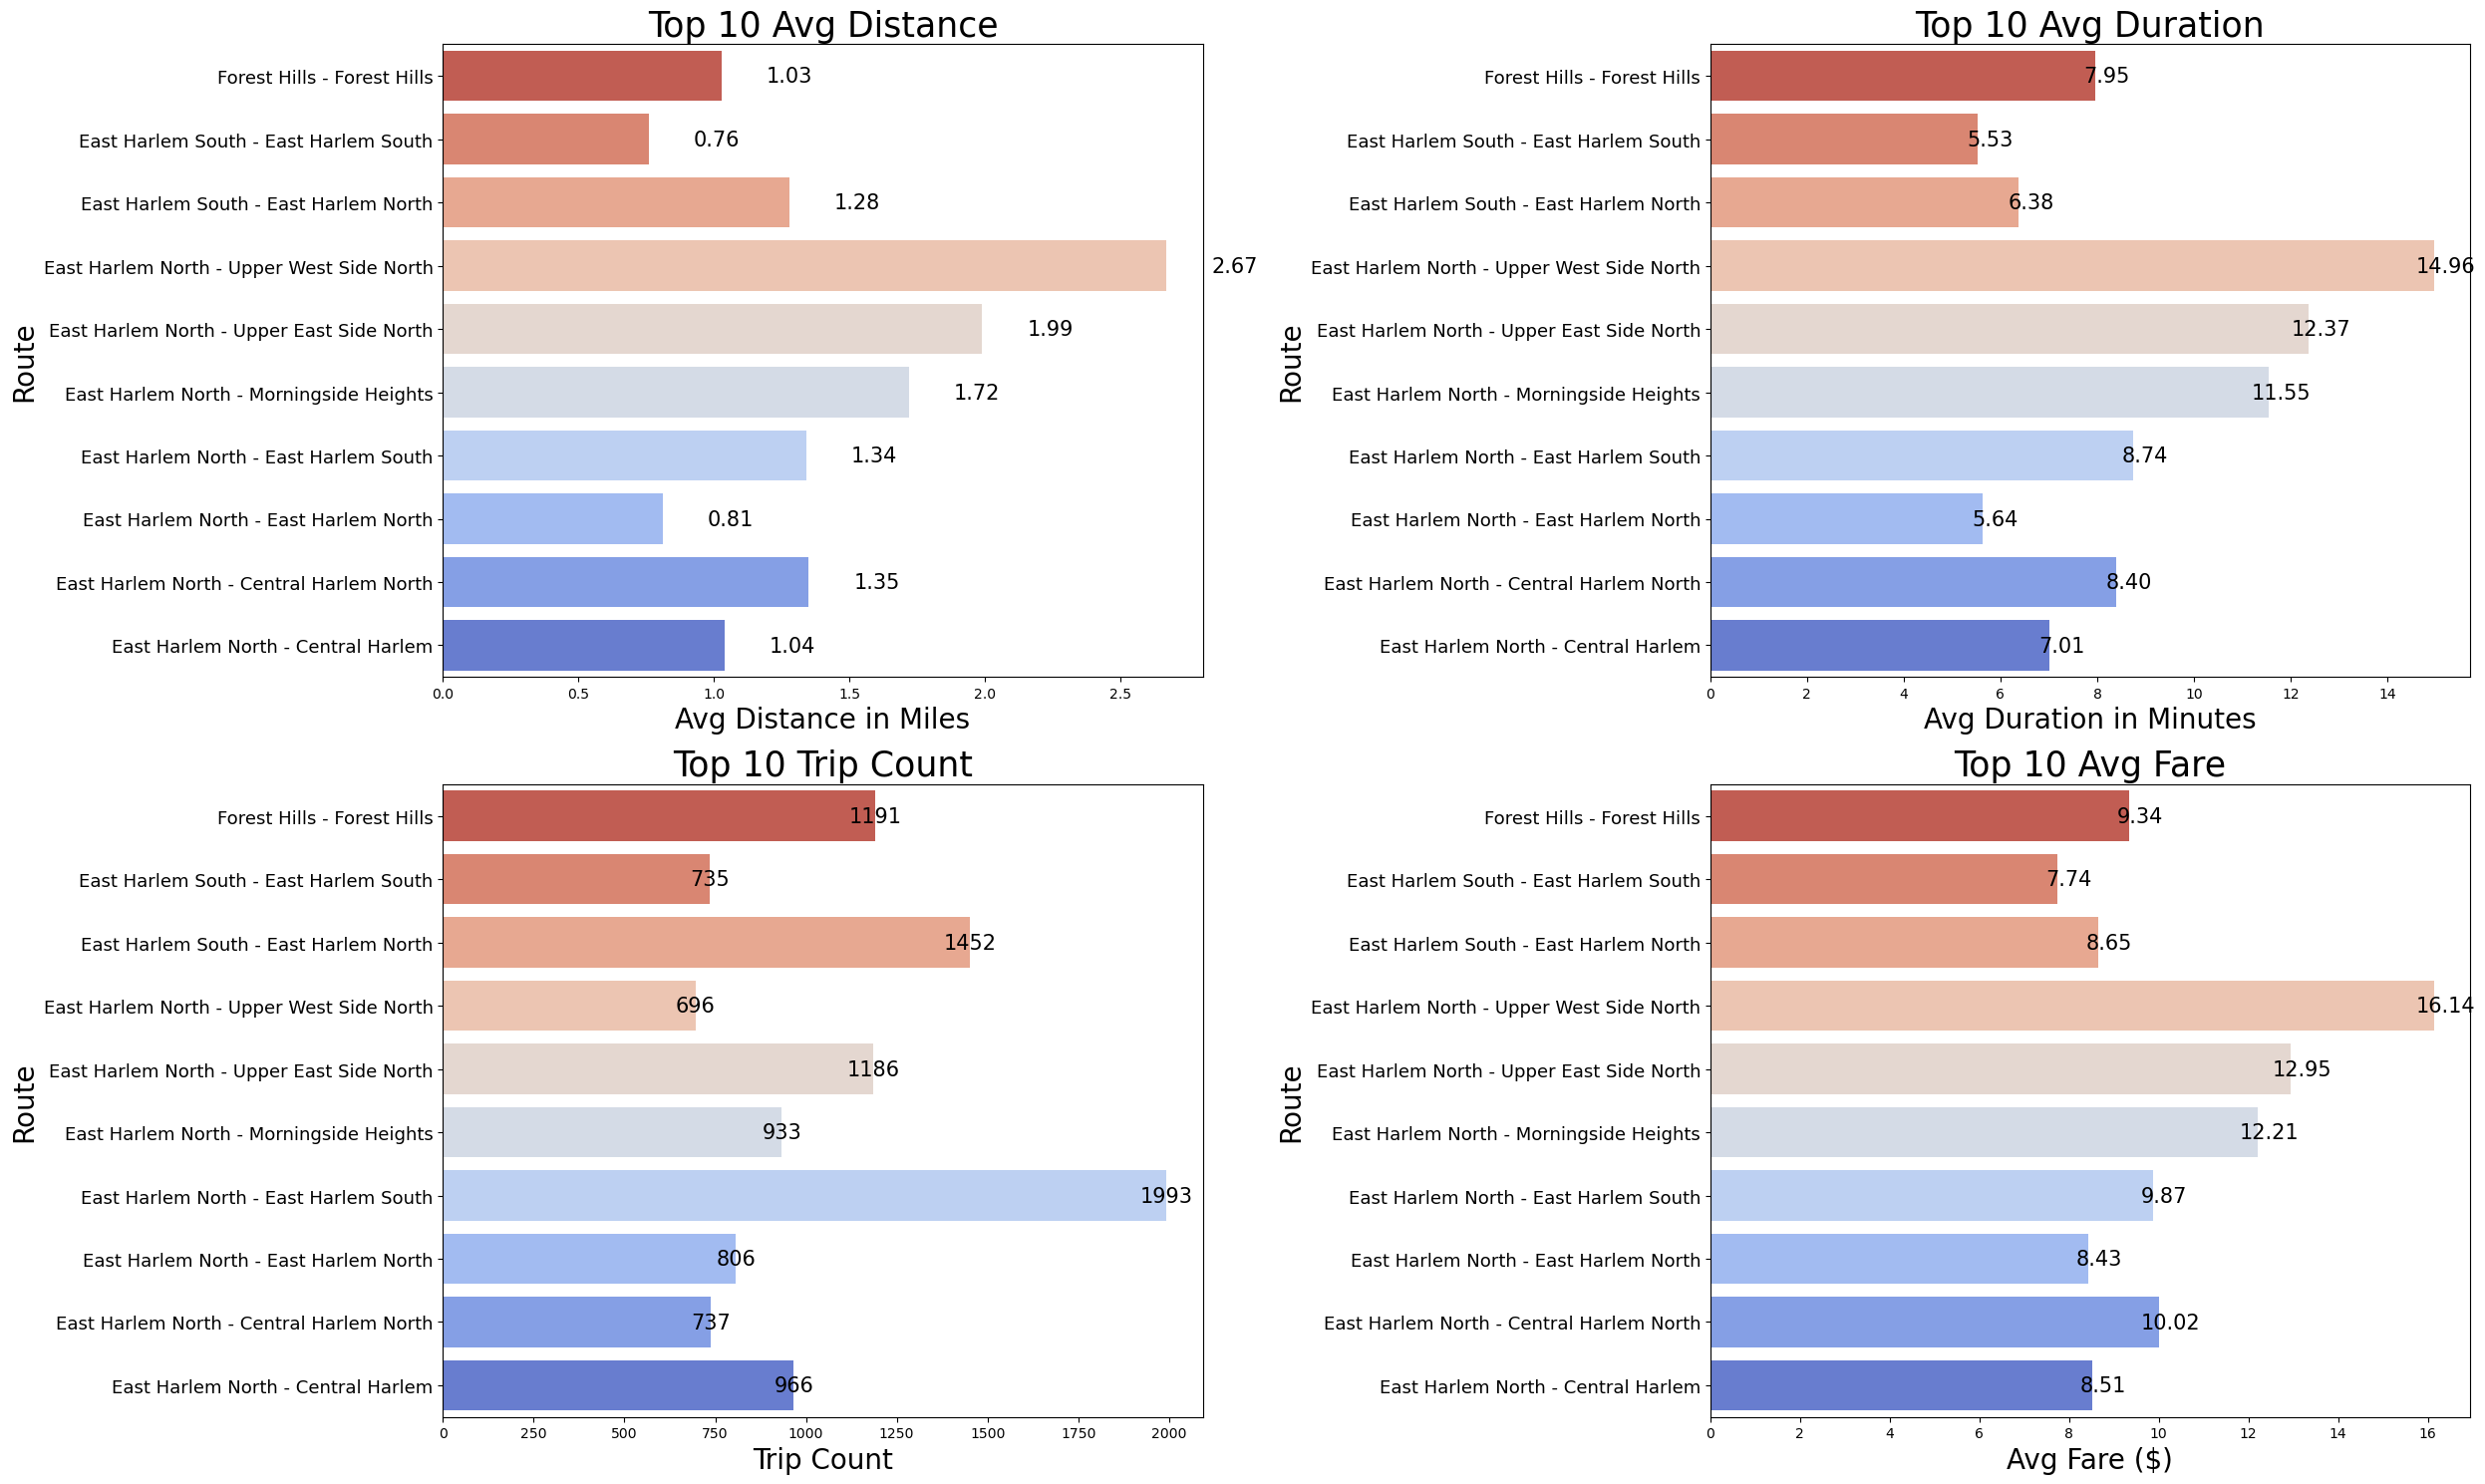

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the size of the overall figure
fig, axes = plt.subplots(2, 2, figsize=(25, 15))  # 2 rows, 2 columns for subplots

# Data preparation
data = trip_amount_dist.sort_values(by='Route', ascending=False)

# Subplot 1: Average Distance
sns.barplot(data=data, y='Route', x='avg_distance', palette=scale, ax=axes[0, 0])
for idx, bar in enumerate(axes[0, 0].patches):
    y_value = bar.get_y() + bar.get_height() / 1.6
    x_value = bar.get_width() + 0.25
    label = "{:.2f}".format(data['avg_distance'].iloc[idx]) 
    axes[0, 0].text(x_value, y_value, label, ha='center', fontsize=15)
axes[0, 0].set_xlabel('Avg Distance in Miles', fontsize=20)
axes[0, 0].set_ylabel('Route', fontsize=20)
axes[0, 0].set_title('Top 10 Avg Distance', fontsize=25)
axes[0, 0].set_yticklabels(axes[0, 0].get_yticklabels(), fontsize=13)

# Subplot 2: Average Duration
sns.barplot(data=data, y='Route', x='avg_duration', palette=scale, ax=axes[0, 1])
for idx, bar in enumerate(axes[0, 1].patches):
    y_value = bar.get_y() + bar.get_height() / 1.6
    x_value = bar.get_width() + 0.25
    label = "{:.2f}".format(data['avg_duration'].iloc[idx]) 
    axes[0, 1].text(x_value, y_value, label, ha='center',fontsize=15)
axes[0, 1].set_xlabel('Avg Duration in Minutes',fontsize=20)
axes[0, 1].set_ylabel('Route',fontsize=20)
axes[0, 1].set_title('Top 10 Avg Duration', fontsize=25)
axes[0, 1].set_yticklabels(axes[0, 0].get_yticklabels(), fontsize=13)

# Subplot 3: Trip Count
sns.barplot(data=data, y='Route', x='trip_count', palette=scale, ax=axes[1, 0])
for idx, bar in enumerate(axes[1, 0].patches):
    y_value = bar.get_y() + bar.get_height() / 1.6
    x_value = bar.get_width() + 0.25
    label = "{}".format(int(data['trip_count'].iloc[idx]))
    axes[1, 0].text(x_value, y_value, label, ha='center',fontsize=15)
axes[1, 0].set_xlabel('Trip Count',fontsize=20)
axes[1, 0].set_ylabel('Route',fontsize=20)
axes[1, 0].set_title('Top 10 Trip Count', fontsize=25)
axes[1, 0].set_yticklabels(axes[0, 0].get_yticklabels(), fontsize=13)

# Subplot 4: Average Fare
sns.barplot(data=data, y='Route', x='avg_fare', palette=scale, ax=axes[1, 1])
for idx, bar in enumerate(axes[1, 1].patches):
    y_value = bar.get_y() + bar.get_height() / 1.6
    x_value = bar.get_width() + 0.25
    label = "{:.2f}".format(data['avg_fare'].iloc[idx])
    axes[1, 1].text(x_value, y_value, label, ha='center',fontsize=15)
axes[1, 1].set_xlabel('Avg Fare ($)',fontsize=20)
axes[1, 1].set_ylabel('Route',fontsize=20)
axes[1, 1].set_title('Top 10 Avg Fare', fontsize=25)
axes[1, 1].set_yticklabels(axes[0, 0].get_yticklabels(), fontsize=13)

# Adjust layout
plt.tight_layout()
plt.show()


`Insights`
- east harlem north - east harlem south route with the highest trip count; If we look at the distance, the journey is not too long, namely 1.34 miles. This makes passengers not really care about sharing rides.
- while the trip duration is also relatively short, namely 8.74 minutes; So the consideration of using ride sharing is also put aside.
- Lastly, the average cost for the East Harlem North - East Harlem South route is also relatively low, 8.34 $. These costs are also not too problematic for customers.

# General Analysis of distance_category, duration_category, payment Type, fare_amount, and trip_Type

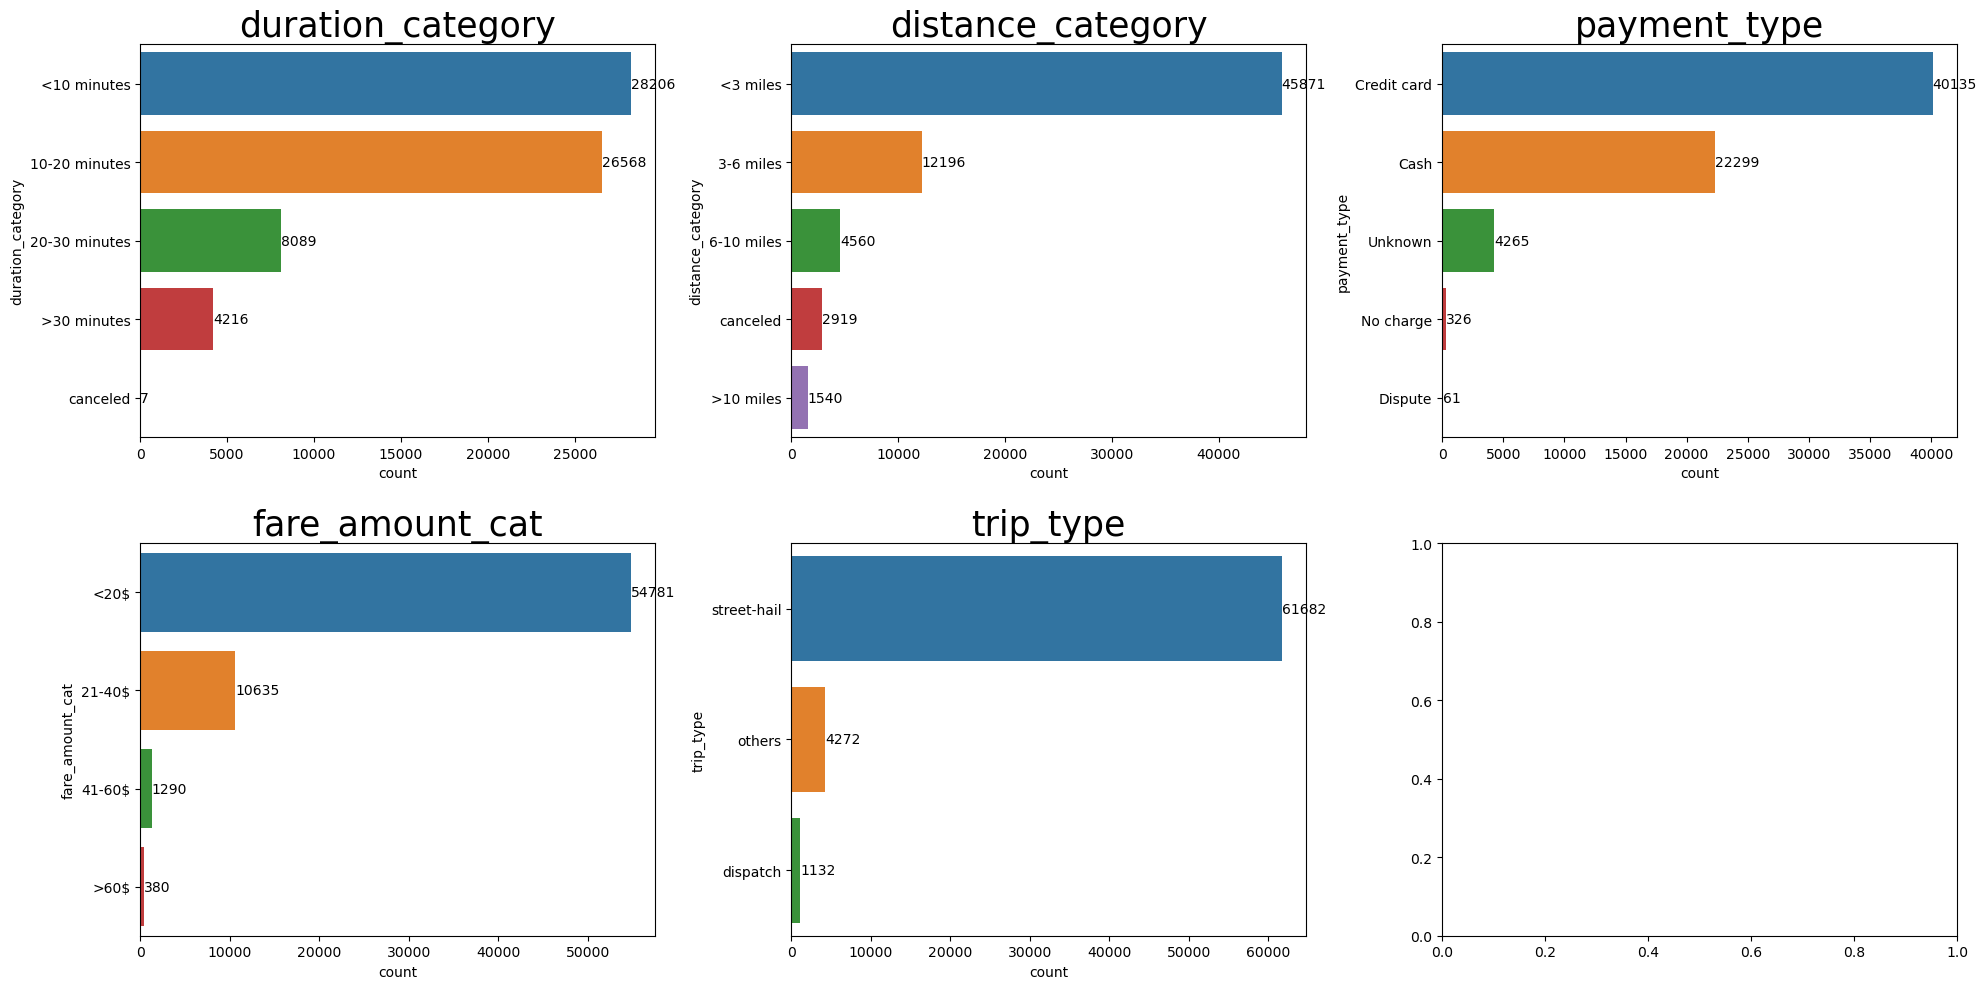

In [24]:
cols = ['duration_category', 'distance_category', 'payment_type', 'fare_amount_cat', 'trip_type']

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
axs = axs.flatten()

for i, col in enumerate(cols):
    # Calculate value counts and sort
    sorted_counts = df[col].value_counts().sort_values(ascending=False)

    # Create a horizontal bar plot with sorted values
    bars = sns.countplot(data=df, y=col, ax=axs[i], order=sorted_counts.index)
    axs[i].set_title(col, fontsize=25)

    # Positioning labels for horizontal bars
    for idx, bar in enumerate(bars.patches):
        x_value = bar.get_width()  # Width of the bar (count)
        y_value = bar.get_y() + bar.get_height() / 2  # Middle of the bar
        label = "{:.0f}".format(bar.get_width())  # Count as label
        axs[i].text(x_value, y_value, label, ha='left', va='center') 

plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()


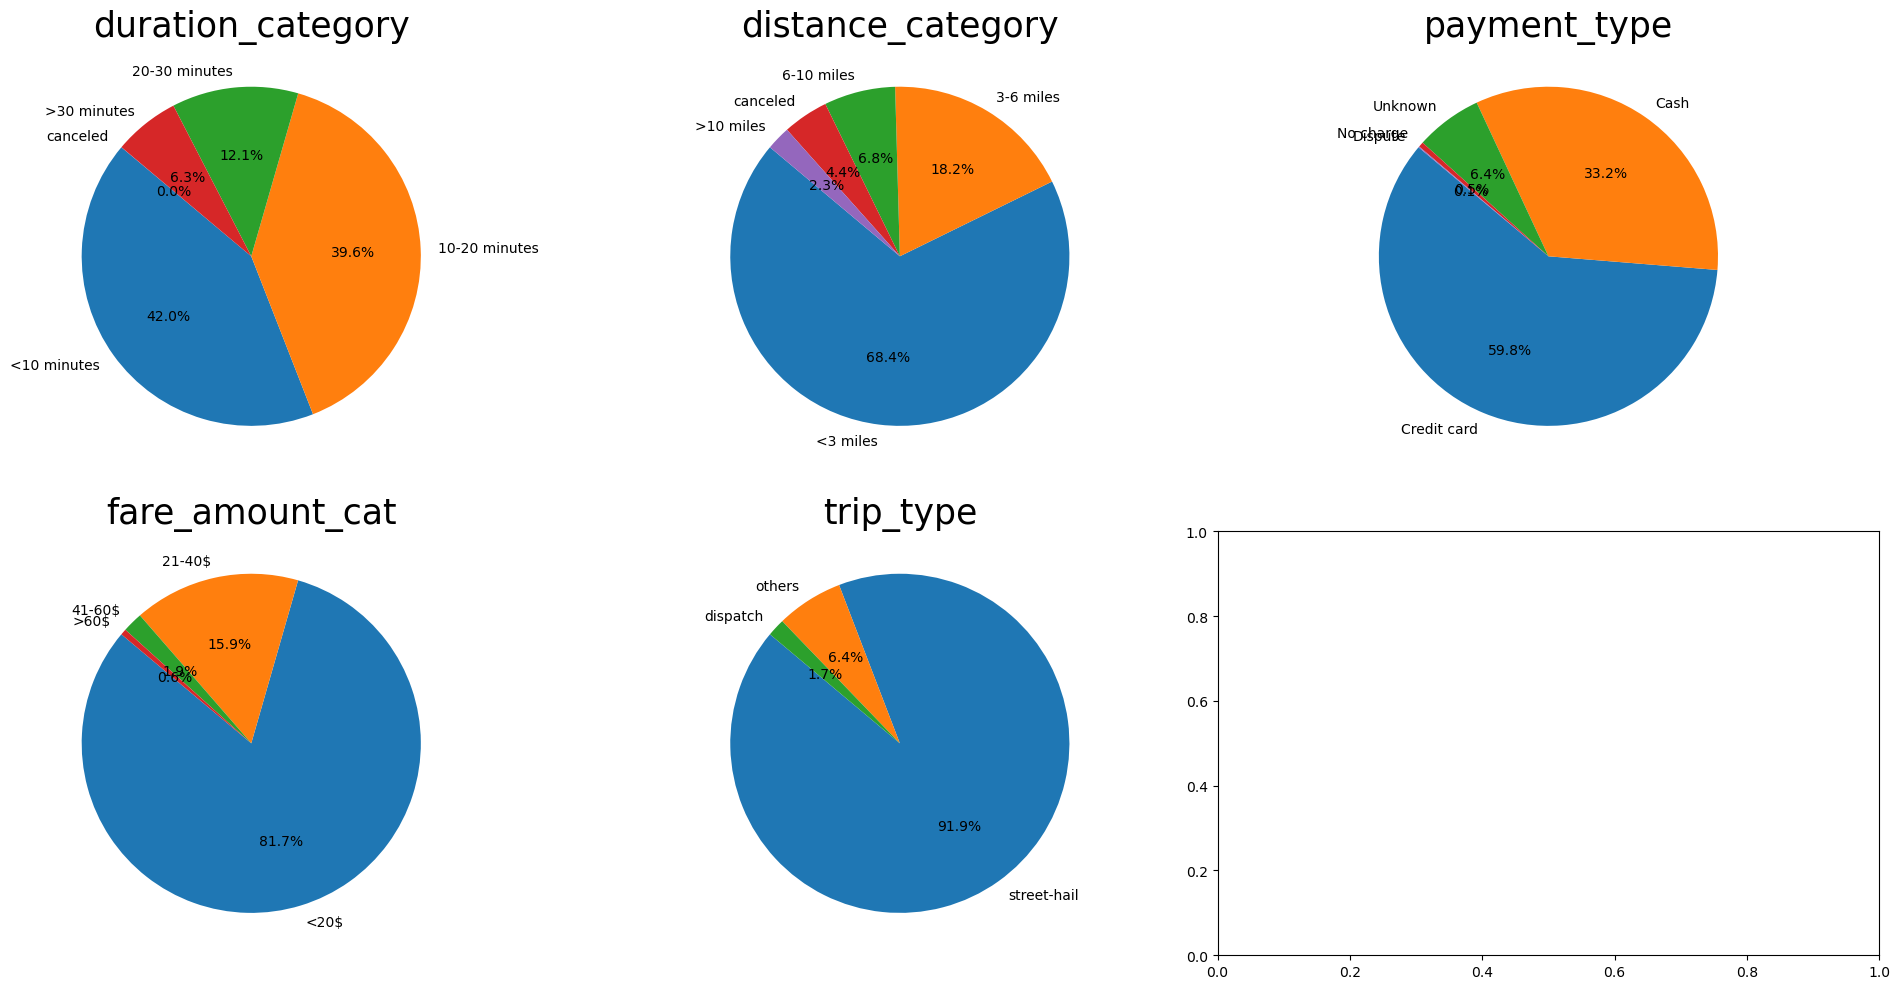

In [25]:
cols = ['duration_category', 'distance_category', 'payment_type', 'fare_amount_cat', 'trip_type']

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
axs = axs.flatten()

for i, col in enumerate(cols):
    # Calculate value counts and sort
    sorted_counts = df[col].value_counts().sort_values(ascending=False)

    # Create a pie chart
    axs[i].pie(sorted_counts, labels=sorted_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(col, fontsize=25)

plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

`Insights`
In general investigation, we can see that:
- Based on the relatively short trip duration, 0 -20 minutes, taxi consumers in New York City need shorter trip duration of time, so they are less likely to consider sharing rides.
- Based on the relatively short travel distance, < 3 miles, taxi consumers in New York City want direct point to point travel. If consumers use sharing rides, there are parties who have to wait longer to take other passengers before the passengers are finally taken to their destination.
- Based on payment type, taxi consumers in New York City tend to use credit cards; Payment using this method will require a little more time to operate the EDC machine, so there is a possibility that other passengers who join the share ride will feel uncomfortable.
- Based on the payment amount category, the nominal amount that must be paid is also relatively small; so that the difference in payment between private payments and ride sharing is not a consideration
- Finally, for the type of taxi order, the majority of taxi consumers in New York City place orders directly on the street (street hailing) so it is very difficult to implement a ride sharing system to align destinations.

# Conclusion and Recommendation

## Conclusion
Generally, the individual use of taxis is due to varying departure times, pick-up spots, and destinations.<br>
In detail, from various analysis methods conducted, "ride-sharing" in New York City is less popular due to the following factors:
1. **Instant Availability (91% street-hailing)**: The majority of taxi users in New York prefer instant access to transportation. Street-hailing is an instant service, something that pre-arranged ride-sharing cannot always guarantee, especially during peak hours.

2. **Short Duration of Trips (91% have short duration)**: Most taxi trips in New York are short trip. This short trip time diminishes the perceived benefits of ride-sharing, like cost savings or environmental impact, since the time and effort to coordinate a shared ride may not seem worth it for such short distances.

3. **Short Distances (68% less than 3 miles)**:  For such trips, the convenience and direct route of a solo taxi ride are preferred over the complexities and potential detours of sharing.

4. **Affordable Costs (81% less than $20 per trip)**: If the average cost of a taxi trip in New York minor part of one's budget, the savings offered by ride-sharing might not be persuasive enough.

## Recomendation
To increase the use of ride-sharing services  to reduce traffic congestion, it's essential to develop a system or application that able to manage passenger orders with features like real-time departure times, pickup points, and drop-off locations. This can be achieved by:
1. Utilizing historical data and trip trends to predict passenger departure times and locations, thereby integrating dynamic routes for efficient pickups and drop-offs.
2. Offering reduced fares and loyalty programs for users who choose ride-sharing, as well as special promotions during peak hours to attract more users.
3. Establishing strategic special pickup and drop-off zones/areas, and advocating for tax incentives or subsidies for ride-sharing users.